<a href="https://colab.research.google.com/github/amarti55/FCC-Engineering-Programming-/blob/master/FCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ABOUT THIS PROJECT

## Questions to Explore
1. How does CO2 consumption relate to GDP in both developing and developed countries?
2. How does CO2 consumption differ between developing and developed countries?
3. Do developing countries rely more on fossil fuel or renewable energy sources? How about developed countries?

#Mount Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive/')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


#GDP country-by-country

##Read in GDP data by country and reformat dataframe

In [4]:
import numpy as np
from numpy import zeros
import pandas as pd 
import re
from matplotlib import pyplot as plt
from __future__ import division

# read in GDP file as data frame. The file provides GDP data by country from 1980-2016 in billion $2010 PPP
df4 = pd.read_csv('/content/drive/My Drive/GDP_data.csv')

# drop extraneous rows 
df4_trim1=df4.drop([0,1,2], axis=0)

# rename relevant columns by their respective country name/year and drop extraneous columns
df4_trim2=df4_trim1.rename(columns={"Unnamed: 1": "Country"})
df4_trim3=df4_trim2.drop('International_data',axis=1)
df4_trim4=df4_trim3.rename(\
                          columns={\
                                   
                                  "Unnamed: 2":"Unit",\
                                  "Unnamed: 3":"1980",\
                                  "Unnamed: 4":"1981",\
                                  "Unnamed: 5":"1982",\
                                  "Unnamed: 6":"1983",\
                                  "Unnamed: 7":"1984",\
                                  "Unnamed: 8":"1985",\
                                  "Unnamed: 9":"1986",\
                                  "Unnamed: 10":"1987",\
                                  "Unnamed: 11":"1988",\
                                  "Unnamed: 12":"1989",\
                                  "Unnamed: 13":"1990",\
                                  "Unnamed: 14":"1991",\
                                  "Unnamed: 15":"1992",\
                                  "Unnamed: 16":"1993",\
                                  "Unnamed: 17":"1994",\
                                  "Unnamed: 18":"1995",\
                                  "Unnamed: 19":"1996",\
                                  "Unnamed: 20":"1997",\
                                  "Unnamed: 21":"1998",\
                                  "Unnamed: 22":"1999",\
                                  "Unnamed: 23":"2000",\
                                  "Unnamed: 24":"2001",\
                                  "Unnamed: 25":"2002",\
                                  "Unnamed: 26":"2003",\
                                  "Unnamed: 27":"2004",\
                                  "Unnamed: 28":"2005",\
                                  "Unnamed: 29":"2006",\
                                  "Unnamed: 30":"2007",\
                                  "Unnamed: 31":"2008",\
                                  "Unnamed: 32":"2009",\
                                  "Unnamed: 33":"2010",\
                                  "Unnamed: 34":"2011",\
                                  "Unnamed: 35":"2012",\
                                  "Unnamed: 36":"2013",\
                                  "Unnamed: 37":"2014",\
                                  "Unnamed: 38":"2015",\
                                  "Unnamed: 39":"2016",\
                                  "Unnamed: 40":"2017",\
                                  "Unnamed: 41":"2018"})

# drop extraneous rows/columns
df4_trim5=df4_trim4.drop([3,4,5],axis=0)
df4_trim6=df4_trim5.drop(['Unit'],axis=1)

# reset index for organizational purposes
df4_trim7=df4_trim6.reset_index()
df4_trim8=df4_trim7.drop(['index'],axis=1)
GDP_data=df4_trim8

# fill NA values with zeros. This enables plotting later on. Note: zero values in late plots can be ignored.
GDP_data['1980']=GDP_data['1980'].fillna(0)
GDP_data['1981']=GDP_data['1981'].fillna(0)
GDP_data['1982']=GDP_data['1982'].fillna(0)
GDP_data['1983']=GDP_data['1983'].fillna(0)
GDP_data['1984']=GDP_data['1984'].fillna(0)
GDP_data['1985']=GDP_data['1985'].fillna(0)
GDP_data['1986']=GDP_data['1986'].fillna(0)
GDP_data['1987']=GDP_data['1987'].fillna(0)
GDP_data['1988']=GDP_data['1988'].fillna(0)
GDP_data['1989']=GDP_data['1989'].fillna(0)
GDP_data['1990']=GDP_data['1990'].fillna(0)
GDP_data['1991']=GDP_data['1991'].fillna(0)
GDP_data['1992']=GDP_data['1992'].fillna(0)
GDP_data['1993']=GDP_data['1993'].fillna(0)
GDP_data['1994']=GDP_data['1994'].fillna(0)
GDP_data['1995']=GDP_data['1995'].fillna(0)
GDP_data['1996']=GDP_data['1996'].fillna(0)
GDP_data['1997']=GDP_data['1997'].fillna(0)
GDP_data['1998']=GDP_data['1998'].fillna(0)
GDP_data['1999']=GDP_data['1999'].fillna(0)
GDP_data['2000']=GDP_data['2000'].fillna(0)
GDP_data['2001']=GDP_data['2001'].fillna(0)
GDP_data['2002']=GDP_data['2002'].fillna(0)
GDP_data['2003']=GDP_data['2003'].fillna(0)
GDP_data['2004']=GDP_data['2004'].fillna(0)
GDP_data['2005']=GDP_data['2005'].fillna(0)
GDP_data['2006']=GDP_data['2006'].fillna(0)
GDP_data['2007']=GDP_data['2007'].fillna(0)
GDP_data['2008']=GDP_data['2008'].fillna(0)
GDP_data['2009']=GDP_data['2009'].fillna(0)
GDP_data['2010']=GDP_data['2010'].fillna(0)
GDP_data['2011']=GDP_data['2011'].fillna(0)
GDP_data['2012']=GDP_data['2012'].fillna(0)
GDP_data['2013']=GDP_data['2013'].fillna(0)
GDP_data['2014']=GDP_data['2014'].fillna(0)
GDP_data['2015']=GDP_data['2015'].fillna(0)
GDP_data['2016']=GDP_data['2016'].fillna(0)
GDP_data

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0,0,0,0,0,0,0,0,27.1184,...,42.9336,44.323,48.1706,53.4357,56.8961,58.6395,57.5893,59.6389,61.1299,63.2694
1,Albania,0,0,0,0,0,0,0,0,13.9482,...,26.3569,27.334,28.0298,28.4271,28.7119,29.2214,29.8787,30.8758,32.0524,33.3901
2,Algeria,0,0,0,0,0,0,0,0,247.149,...,439.816,455.649,468.863,484.804,498.379,517.317,536.458,553.624,561.376,574.287
3,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,Angola,0,0,0,0,0,0,0,0,58.062,...,139.377,145.516,150.568,163.43,171.527,179.799,181.496,176.813,176.553,169.65
5,Antarctica,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
6,Antigua and Barbuda,0,0,0,0,0,0,0,0,0.9873,...,1.9203,1.782,1.745,1.8061,1.8043,1.8963,1.9733,2.07874,2.1632,2.2389
7,Argentina,425.8948,403.6268,390.879,406.9522,415.0866,386.2373,413.8048,424.5269,416.485,...,687.212,756.796,802.234,793.999,813.097,792.668,814.316,799.476,822.295,801.148
8,Armenia,--,--,--,--,--,--,--,--,--,...,18.4826,18.892,19.7706,21.1872,21.8864,22.6743,23.3999,23.4467,25.2052,27.091
9,Aruba,--,--,--,--,--,--,0,0,1.327,...,2.4799,2.3965,2.4815,2.4475,2.5502,2.5719,2.5603,2.55485,2.5757,2.6068


##Create new dataframe of GDP (Billion $2010 PPP) by country from 1980 to 2016

In [5]:
# the dataframe created above is organized but not suited for plotting. Rearrange data so countries are listed as columns and years as rows

# create list of years
years2=[]
for i in range(1980,2017):
  years2.append(i)

# create list of countries
country_name=[]
for i in range(0,228):
  country_name.append(GDP_data.loc[i]['Country'])

# create array of GDP 
country_GDP_list=[]
GDP_array=np.zeros([228,37])
z=0

for i in range(0,228):
  country_GDP=GDP_data.iloc[i,1:40]
  for i in range(0,37):
    country_GDP_list.append(country_GDP[i])
    for n, i in enumerate(country_GDP_list):
      if i=='--' or i=='-':
        country_GDP_list[n]=0 
  GDP_array[z]=country_GDP_list
  country_GDP_list=[]
  z=z+1    

# create new dataframe
GDP_arrayT=np.transpose(GDP_array)

GDP_df=pd.DataFrame(GDP_arrayT,years2,country_name)
GDP_df

,Afghanistan,Albania,Algeria,American Samoa,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Vanuatu,Venezuela,Vietnam,"Virgin Islands, U.S.","Virgin Islands, British",Wake Island,Western Sahara,Yemen,Zambia,Zimbabwe
1980,0.0000,0.0000,0.000,0.0,0.0000,0.0,0.00000,425.8948,0.0000,0.00000,...,0.000000,258.9638,0.0000,0.00000,0.000000,0.0,0.0,0.0000,0.0000,0.0000
1981,0.0000,0.0000,0.000,0.0,0.0000,0.0,0.00000,403.6268,0.0000,0.00000,...,0.000000,258.0243,0.0000,0.00000,0.000000,0.0,0.0,0.0000,0.0000,0.0000
1982,0.0000,0.0000,0.000,0.0,0.0000,0.0,0.00000,390.8790,0.0000,0.00000,...,0.000000,252.6807,0.0000,0.00000,0.000000,0.0,0.0,0.0000,0.0000,0.0000
1983,0.0000,0.0000,0.000,0.0,0.0000,0.0,0.00000,406.9522,0.0000,0.00000,...,0.000000,247.2430,0.0000,0.00000,0.000000,0.0,0.0,0.0000,0.0000,0.0000
1984,0.0000,0.0000,0.000,0.0,0.0000,0.0,0.00000,415.0866,0.0000,0.00000,...,0.000000,253.5572,0.0000,0.00000,0.000000,0.0,0.0,0.0000,0.0000,0.0000
1985,0.0000,0.0000,0.000,0.0,0.0000,0.0,0.00000,386.2373,0.0000,0.00000,...,0.000000,254.0474,0.0000,0.00000,0.000000,0.0,0.0,0.0000,0.0000,0.0000
1986,0.0000,0.0000,0.000,0.0,0.0000,0.0,0.00000,413.8048,0.0000,0.00000,...,0.000000,270.5867,0.0000,0.00000,0.000000,0.0,0.0,0.0000,0.0000,0.0000
1987,0.0000,0.0000,0.000,0.0,0.0000,0.0,0.00000,424.5269,0.0000,0.00000,...,0.000000,280.2783,0.0000,0.00000,0.000000,0.0,0.0,0.0000,0.0000,0.0000
1988,27.1184,13.9482,247.149,0.0,58.0620,0.0,0.98730,416.4850,0.0000,1.32700,...,0.278800,296.5942,86.5555,1.15720,0.145000,0.0,0.0,0.0000,18.4591,12.9664
1989,25.2042,15.3202,258.023,0.0,58.2942,0.0,1.03920,387.5958,0.0000,1.48800,...,0.288400,271.1765,90.6041,1.15120,0.157600,0.0,0.0,0.0000,18.6353,13.6427


##Plot GDP dataframe

Text(0.5, 1.0, 'GDP 1980-2016 by country')

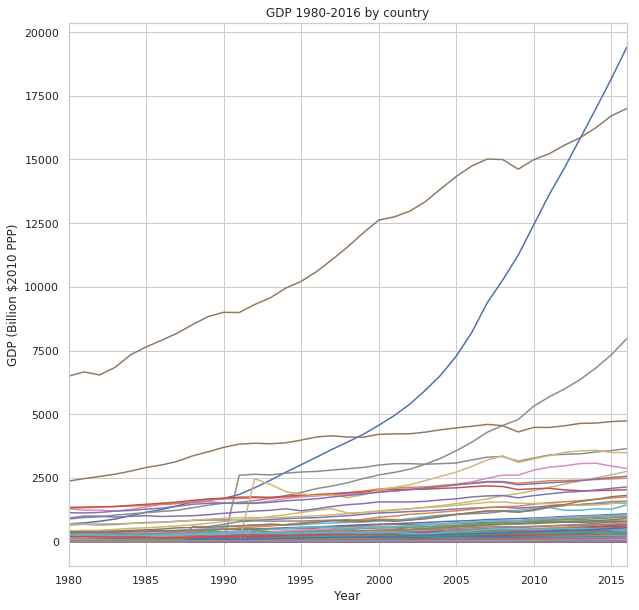

In [6]:
# plot the GDP trends per country from 1980-2016. This is meant only to demonstrate the general global trend in GDP, not explicit patterns.
# the viewer should note a general increasing trend in global GDP

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

GDP_df.plot(figsize=[10,10],legend=False)
plt.xlabel('Year')
plt.ylabel('GDP (Billion $2010 PPP)')
plt.title('GDP 1980-2016 by country')

#Categorize developing vs. developed countries

##Read in population data and reformat dataframe

In [7]:
import numpy as np
from numpy import zeros
import pandas as pd 
import re
from matplotlib import pyplot as plt
from __future__ import division

# read in population data by country, organize data, and manipulate to isolate relevant rows
df6=pd.read_csv('/content/drive/My Drive/population_data.csv')
df6_trim1=df6.drop([0,1,2,3,4,5],axis=0)
df6_trim2=df6_trim1.drop(['International_data'],axis=1)
df6_trim3=df6_trim2.drop(['Unnamed: 2'],axis=1)
df6_trim4=df6_trim3.drop(['Unnamed: 3'],axis=1)
df6_trim5=df6_trim4.rename(columns={'Unnamed: 4':'2016 population (1000 people)'})
df6_trim6=df6_trim5.rename(columns={'Unnamed: 1':'Country'})
df6_trim7=df6_trim6.reset_index()
df6_trim8=df6_trim7.drop(['index'],axis=1)
population_data=df6_trim8

# get 2016 GDP data: data from 2016 will be most relevant for categorizing developing vs developed countries today.
GDP_2016=GDP_data['2016']

# create dataframe with country, 2016 population, and 2016 GDP. The population data is included as a reference for the size of each country.
population_data['2016 GDP']=GDP_2016

# fill NA population values with 1 for plotting purposes
population_data['2016 population (1000 people)']=population_data['2016 population (1000 people)'].fillna(1)
for n, i in enumerate(population_data['2016 population (1000 people)']):
      if i=='--' or i=='-' or i=='0':
        population_data['2016 population (1000 people)'][n]=1

# fill NA GDP values with 0 for plotting purposes
for n, i in enumerate(population_data['2016 GDP']):
      if i=='--' or i=='-':
        population_data['2016 GDP'][n]=0
        
population_data


,Country,2016 population (1000 people),2016 GDP
0,Afghanistan,34600.2,59.6389
1,Albania,2927.09,30.8758
2,Algeria,40563.9,553.624
3,American Samoa,1,0
4,Angola,28852.9,176.813
5,Antarctica,1,0
6,Antigua and Barbuda,100.96,2.07874
7,Argentina,43897.88,799.476
8,Armenia,2921.3,23.4467
9,Aruba,104.76,2.55485


##Determine developing countries


*   GDP per capita of $12,000 is an unoffical threshold for characterizaton as a developed economy. For the purpose of this project, countries with GDP per capita below this threshold are consisdered developing economies.

https://www.investopedia.com/terms/d/developed-economy.asp




In [8]:
# determine countries with GDP PPP < 12

# isolate 2016 GDP by country
GDP_list=[]
for i in range(0,228):
  GDP=population_data.loc[i]['2016 GDP']
  GDP_list.append(GDP)

# convert GDP string value to float value
GDP_listfl=[]
for i in range(0,228):
  fl=float(GDP_list[i])
  GDP_listfl.append(fl)

# check if GDP float value is less than 12. If so, record the country name and index as developing. If not, record the country name and index as developed.
developing_country_list=[]
developing_country_idx=[]
developed_country_list=[]
developed_country_idx=[]
for i in range(0,228):
  if GDP_listfl[i]<12:
    name=population_data.loc[i]['Country']
    developing_idx=i
    developing_country_list.append(name)
    developing_country_idx.append(developing_idx)
  else:
    developed_name=population_data.loc[i]['Country']
    developed_idx=i
    developed_country_list.append(developed_name)
    developed_country_idx.append(developed_idx)
  
print(developing_country_list)
print(developed_country_list)

['American Samoa', 'Antarctica', 'Antigua and Barbuda', 'Aruba', 'Bahamas, The', 'Barbados', 'Belize', 'Bermuda', 'Bhutan', 'Burundi', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Comoros', 'Cook Islands', 'Djibouti', 'Dominica', 'Eritrea', 'Falkland Islands (Islas Malvinas)', 'Faroe Islands', 'Fiji', 'Former Czechoslovakia', 'Former Serbia and Montenegro', 'Former U.S.S.R.', 'Former Yugoslavia', 'French Guiana', 'French Polynesia', 'Gambia, The', 'Germany, East', 'Germany, West', 'Gibraltar', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guinea-Bissau', 'Guyana', 'Hawaiian Trade Zone', 'Kiribati', 'Lesotho', 'Liberia', 'Maldives', 'Martinique', 'Moldova', 'Montserrat', 'Morocco', 'Nepal', 'New Caledonia', 'New Zealand', 'Northern Mariana Islands', 'Palestinian Territories', 'Saint Helena', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Pierre and Miquelon', 'Saint Vincent/Grenadines', 'Samoa', 'Sao Tome and Principe', 'Seychelles', 'Sierra Leone', 'Solomon Islands', '

##Create GDP dataframe for developing countries

In [9]:
# create array of developing countries GDP data

# start with blank array to later fill in with data
developing_GDParray=np.zeros([76,37])
developing_country_GDP_list=[]
p=0

# method: iterate through country rows, store country GDP in list, fill GDP array with country GDP data row by row
for i in range(0,76):
  index=developing_country_idx[i]
  developing_country_GDP=GDP_data.iloc[index,1:38]
  for i in range(0,37):
    developing_country_GDP_list.append(developing_country_GDP[i])
    for n, i in enumerate(developing_country_GDP_list):
      if i=='--' or i=='-':
        developing_country_GDP_list[n]=0 
  developing_GDParray[p]=developing_country_GDP_list
  developing_country_GDP_list=[]
  p=p+1 

# create new dataframe
developing_GDParrayT=np.transpose(developing_GDParray)

developing_GDP_df=pd.DataFrame(developing_GDParrayT,years2,developing_country_list)
developing_GDP_df  

,American Samoa,Antarctica,Antigua and Barbuda,Aruba,"Bahamas, The",Barbados,Belize,Bermuda,Bhutan,Burundi,...,Togo,Turkmenistan,Turks and Caicos Islands,U.S. Pacific Islands,U.S. Territories,Vanuatu,"Virgin Islands, U.S.","Virgin Islands, British",Wake Island,Western Sahara
1980,0.0,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.43440,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
1981,0.0,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.49480,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
1982,0.0,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.51170,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
1983,0.0,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.56960,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
1984,0.0,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.59510,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
1985,0.0,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.62020,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
1986,0.0,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.69290,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
1987,0.0,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.89180,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
1988,0.0,0.0,0.98730,1.32700,7.4092,3.73540,0.73220,3.95700,0.93630,4.64680,...,0.308600,0.0,0.0,0.0,0.0,0.278800,1.15720,0.145000,0.0,0.0
1989,0.0,0.0,1.03920,1.48800,7.9077,3.86980,0.84560,3.96190,1.00590,4.70980,...,0.309800,0.0,0.0,0.0,0.0,0.288400,1.15120,0.157600,0.0,0.0


##Create GDP dataframe for developed countries

In [10]:
# create array of developed countries GDP data

# start with blank array to later fill in with data
developed_GDParray=np.zeros([152,37])
developed_country_GDP_list=[]
m=0

# method: iterated through country rows, store country GDP in list, fill GDP array with country GDP data row by row
for i in range(0,152):
  index=developed_country_idx[i]
  developed_country_GDP=GDP_data.iloc[index,1:38]
  for i in range(0,37):
    developed_country_GDP_list.append(developed_country_GDP[i])
    for n, i in enumerate(developed_country_GDP_list):
      if i=='--' or i=='-':
        developed_country_GDP_list[n]=0 
  developed_GDParray[m]=developed_country_GDP_list
  developed_country_GDP_list=[]
  m=m+1 

# create new dataframe
developed_GDParrayT=np.transpose(developed_GDParray)

developed_GDP_df=pd.DataFrame(developed_GDParrayT,years2,developed_country_list)
developed_GDP_df 

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1980,0.0000,0.0000,0.000,0.0000,425.8948,0.0000,354.9548,185.8050,0.0000,0.0000,...,194.356,1133.743,6496.27,0.0000,0.0000,258.9638,0.0000,0.0000,0.0000,0.0000
1981,0.0000,0.0000,0.000,0.0000,403.6268,0.0000,369.6185,185.5560,0.0000,0.0000,...,199.961,1125.000,6661.13,0.0000,0.0000,258.0243,0.0000,0.0000,0.0000,0.0000
1982,0.0000,0.0000,0.000,0.0000,390.8790,0.0000,370.3602,189.1016,0.0000,0.0000,...,183.327,1147.617,6541.06,0.0000,0.0000,252.6807,0.0000,0.0000,0.0000,0.0000
1983,0.0000,0.0000,0.000,0.0000,406.9522,0.0000,367.9444,194.2878,0.0000,0.0000,...,178.549,1196.067,6840.88,0.0000,0.0000,247.2430,0.0000,0.0000,0.0000,0.0000
1984,0.0000,0.0000,0.000,0.0000,415.0866,0.0000,392.5194,195.0228,0.0000,0.0000,...,186.512,1223.294,7335.97,0.0000,0.0000,253.5572,0.0000,0.0000,0.0000,0.0000
1985,0.0000,0.0000,0.000,0.0000,386.2373,0.0000,412.2970,199.4111,0.0000,0.0000,...,181.911,1274.617,7641.80,0.0000,0.0000,254.0474,0.0000,0.0000,0.0000,0.0000
1986,0.0000,0.0000,0.000,0.0000,413.8048,0.0000,421.0400,204.1343,0.0000,0.0000,...,143.335,1314.647,7906.42,0.0000,0.0000,270.5867,0.0000,0.0000,0.0000,0.0000
1987,0.0000,0.0000,0.000,0.0000,424.5269,0.0000,442.0210,207.4746,0.0000,0.0000,...,148.466,1384.333,8179.95,0.0000,0.0000,280.2783,0.0000,0.0000,0.0000,0.0000
1988,27.1184,13.9482,247.149,58.0620,416.4850,0.0000,460.3580,216.7151,0.0000,16.2837,...,148.112,1464.047,8521.62,30.5483,0.0000,296.5942,86.5555,0.0000,18.4591,12.9664
1989,25.2042,15.3202,258.023,58.2942,387.5958,0.0000,481.6520,225.6987,0.0000,16.3189,...,170.763,1501.655,8834.61,30.8855,0.0000,271.1765,90.6041,0.0000,18.6353,13.6427


# CO2 consumption country-by-country

*   note: there are 228 regions listed, representing locations throughout all 195 countries. From here on, these regions are referred to as "countries" for simplicity.



##Read in CO2 Emissions by country and reformat data frame

In [11]:
import numpy as np 
from numpy import zeros
import pandas as pd 
import re
from matplotlib import pyplot as plt
import numpy as np


# read in CO2 emissions data by country. The file provides CO2 emissions, which equates to CO2 consumption, in MMTon from 1980-2016.
df3=pd.read_csv('/content/drive/My Drive/CO2_Emissions_by_Country.csv')

# drop extraneous rows
df3_trim1=df3.drop([0,1,2], axis=0)

# country name and emissions label are in the same column, rename Category to later separate.
df3_trim2=df3_trim1.rename(columns={"Unnamed: 1": "Category"})

# drop extraneous rows and columns
df3_trim3=df3_trim2[df3_trim2.Category != 'Emissions']
df3_trim4=df3_trim3.drop('International_data',axis=1)

# rename columns by year
df3_trim5=df3_trim4.rename(\
                          columns={\
                                   
                                  "Unnamed: 2":"Unit",\
                                  "Unnamed: 3":"1980",\
                                  "Unnamed: 4":"1981",\
                                  "Unnamed: 5":"1982",\
                                  "Unnamed: 6":"1983",\
                                  "Unnamed: 7":"1984",\
                                  "Unnamed: 8":"1985",\
                                  "Unnamed: 9":"1986",\
                                  "Unnamed: 10":"1987",\
                                  "Unnamed: 11":"1988",\
                                  "Unnamed: 12":"1989",\
                                  "Unnamed: 13":"1990",\
                                  "Unnamed: 14":"1991",\
                                  "Unnamed: 15":"1992",\
                                  "Unnamed: 16":"1993",\
                                  "Unnamed: 17":"1994",\
                                  "Unnamed: 18":"1995",\
                                  "Unnamed: 19":"1996",\
                                  "Unnamed: 20":"1997",\
                                  "Unnamed: 21":"1998",\
                                  "Unnamed: 22":"1999",\
                                  "Unnamed: 23":"2000",\
                                  "Unnamed: 24":"2001",\
                                  "Unnamed: 25":"2002",\
                                  "Unnamed: 26":"2003",\
                                  "Unnamed: 27":"2004",\
                                  "Unnamed: 28":"2005",\
                                  "Unnamed: 29":"2006",\
                                  "Unnamed: 30":"2007",\
                                  "Unnamed: 31":"2008",\
                                  "Unnamed: 32":"2009",\
                                  "Unnamed: 33":"2010",\
                                  "Unnamed: 34":"2011",\
                                  "Unnamed: 35":"2012",\
                                  "Unnamed: 36":"2013",\
                                  "Unnamed: 37":"2014",\
                                  "Unnamed: 38":"2015",\
                                  "Unnamed: 39":"2016"})
df3_trim6=df3_trim5.drop([3],axis=0)
df3_trim7=df3_trim6.drop('Unit', axis=1)
emissions_data=df3_trim7

# fill NA values with zero for later plotting purposes.
emissions_data['1980']=emissions_data['1980'].fillna(0)
emissions_data['1981']=emissions_data['1981'].fillna(0)
emissions_data['1982']=emissions_data['1982'].fillna(0)
emissions_data['1983']=emissions_data['1983'].fillna(0)
emissions_data['1984']=emissions_data['1984'].fillna(0)
emissions_data['1985']=emissions_data['1985'].fillna(0)
emissions_data['1986']=emissions_data['1986'].fillna(0)
emissions_data['1987']=emissions_data['1987'].fillna(0)
emissions_data['1988']=emissions_data['1988'].fillna(0)
emissions_data['1989']=emissions_data['1989'].fillna(0)
emissions_data['1990']=emissions_data['1990'].fillna(0)
emissions_data['1991']=emissions_data['1991'].fillna(0)
emissions_data['1992']=emissions_data['1992'].fillna(0)
emissions_data['1993']=emissions_data['1993'].fillna(0)
emissions_data['1994']=emissions_data['1994'].fillna(0)
emissions_data['1995']=emissions_data['1995'].fillna(0)
emissions_data['1996']=emissions_data['1996'].fillna(0)
emissions_data['1997']=emissions_data['1997'].fillna(0)
emissions_data['1998']=emissions_data['1998'].fillna(0)
emissions_data['1999']=emissions_data['1999'].fillna(0)
emissions_data['2000']=emissions_data['2000'].fillna(0)
emissions_data['2001']=emissions_data['2001'].fillna(0)
emissions_data['2002']=emissions_data['2002'].fillna(0)
emissions_data['2003']=emissions_data['2003'].fillna(0)
emissions_data['2004']=emissions_data['2004'].fillna(0)
emissions_data['2005']=emissions_data['2005'].fillna(0)
emissions_data['2006']=emissions_data['2006'].fillna(0)
emissions_data['2007']=emissions_data['2007'].fillna(0)
emissions_data['2008']=emissions_data['2008'].fillna(0)
emissions_data['2009']=emissions_data['2009'].fillna(0)
emissions_data['2010']=emissions_data['2010'].fillna(0)
emissions_data['2011']=emissions_data['2011'].fillna(0)
emissions_data['2012']=emissions_data['2012'].fillna(0)
emissions_data['2013']=emissions_data['2013'].fillna(0)
emissions_data['2014']=emissions_data['2014'].fillna(0)
emissions_data['2015']=emissions_data['2015'].fillna(0)
emissions_data['2016']=emissions_data['2016'].fillna(0)
emissions_data

,Category,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,CO2 Emissions,1.3259645184445,1.5096277354718,1.6596046796848,2.0596046796848,2.0654361143814,2.0935159167121,2.311010238436,3.9560247490289,6.4691701670919,...,1.2508171885087,1.4725914372414,6.2307597790056,7.7876364963828,11.015396519173,9.6647099965672,7.8355604167619,7.0965583515981,7.7328606430558,8.5414879146609
8,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,CO2 Emissions,9.6886787065973,9.5987532500495,9.677464452047,10.068964251123,10.218766820775,10.18531286195,10.250910642016,9.9316212568438,10.052810127373,...,4.5735799070505,4.5628257892842,3.0869022306268,4.0043178135619,4.0952260783593,3.6512595532475,4.2413379000591,4.4749986653402,4.1004750296263,4.2211551749104
11,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,CO2 Emissions,65.624803187103,53.28524226698,68.559023183442,72.483302519971,74.64125818051,71.432050157453,73.603106009166,78.67576956911,82.611533971512,...,96.343115859685,102.3251380623,109.75120350683,112.68457628266,121.45248487459,129.6666280276,128.76690233987,142.72216707478,144.82849037714,138.72324702637
14,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,CO2 Emissions,0.40232,0.5,0.6,0.4,0.5,0.4,0.5,0.5,0.5,...,0.7,0.7,0.6,0.6,0.35609118618656,0.35678335824806,0.35560055970028,0.35524591528564,0.35524591528564,0.36066184441354
17,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,CO2 Emissions,6.225568096,6.12099778,5.772157256,5.825507456,5.480157732,6.435708062,7.103659128,7.163209696,8.044461552,...,24.117848662833,23.431797907628,24.92774911718,30.259832905316,30.847924306109,32.884135700755,34.226255233299,35.761020678068,36.182259864299,21.417035574283


##Create new dataframe of CO2 emissions (MMTon) by country from 1980 to 2016

In [12]:
# the dataframe created above cleary displays the data, but is not suited for plotting.

# create list of x-axis values for emissions vs time plot
years=[]
for i in range(1980,2017):
  years.append(i)


# create list of countries    
df_country=emissions_data['Category']
drop_emissions_rows=[]

# separate the country name and CO2 emissions rows into separate containers
for i in range(7,686,3):
  drop_emissions_rows.append(i)
df_country1=df_country.drop(drop_emissions_rows, axis=0)
df_country2=df_country1.reset_index()
df_country3=df_country2.drop(['index'],axis=1)
df_country4=df_country3.drop([228],axis=0)

country_list=[]
for i in range(0,228):
  name=df_country4.loc[i]['Category']
  country_list.append(name)

# create array of emissions data
drop_country_rows=[]
for i in range(5,686,3):
  drop_country_rows.append(i)
co2_emissions_data=emissions_data.drop(drop_country_rows,axis=0)
co2_emissions_data1=co2_emissions_data.reset_index()
co2_emissions_data2=co2_emissions_data1.drop(['index'],axis=1)
co2_emissions_data3=co2_emissions_data2.drop([227],axis=0)

# start with empty array to fill with total emissions data
emissions_array=np.zeros([228,37])
country_emissions_list=[]
x=0

# method: iterate through each country and store its CO2 emissions data in the empty array
for i in range(0,228):
  country_emissions=co2_emissions_data3.iloc[i,1:38]
  for i in range(0,37):
    country_emissions_list.append(country_emissions[i])
    for n, i in enumerate(country_emissions_list):
      if i=='--' or i=='-':
        country_emissions_list[n]=0 
  emissions_array[x]=country_emissions_list
  country_emissions_list=[]
  x=x+1


# create new dataframe
emissions_arrayT=np.transpose(emissions_array)

emissions_df=pd.DataFrame(emissions_arrayT,years,country_list)
emissions_df

,Afghanistan,Albania,Algeria,American Samoa,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Vanuatu,Venezuela,Vietnam,"Virgin Islands, U.S.","Virgin Islands, British",Wake Island,Western Sahara,Yemen,Zambia,Zimbabwe
1980,1.325965,9.688679,65.624803,0.402320,6.225568,0.140640,0.407380,93.306520,0.000000,0.000000,...,0.116630,94.129707,14.477434,16.939450,0.022170,1.235660,0.156990,6.434220,3.626516,7.673688
1981,1.509628,9.598753,53.285242,0.500000,6.120998,0.100000,0.400000,90.995690,0.000000,0.000000,...,0.100000,101.833414,16.030770,15.000000,0.034980,1.200000,0.200000,6.600000,3.130412,7.531570
1982,1.659605,9.677464,68.559023,0.600000,5.772157,0.100000,0.500000,97.660718,0.000000,0.000000,...,0.100000,101.992269,17.428158,11.000000,0.034680,1.200000,0.200000,7.700000,3.232210,7.332898
1983,2.059605,10.068964,72.483303,0.400000,5.825507,0.100000,0.300000,99.390070,0.000000,0.000000,...,0.099510,96.580400,17.615514,7.700000,0.034980,1.200000,0.200000,7.000000,3.099038,7.584832
1984,2.065436,10.218767,74.641258,0.500000,5.480158,0.200000,0.300000,103.825117,0.000000,0.000000,...,0.100000,95.682199,17.715546,9.000000,0.032100,1.200000,0.200000,8.900000,2.860143,7.783563
1985,2.093516,10.185313,71.432050,0.400000,6.435708,0.200000,0.300000,98.197139,0.000000,0.000000,...,0.100000,96.787648,17.698275,10.000000,0.032750,1.200000,0.200000,9.900000,2.781585,9.060527
1986,2.311010,10.250911,73.603106,0.500000,7.103659,0.200000,0.300000,104.903184,0.000000,0.100000,...,0.100000,104.779253,19.590510,6.700000,0.037770,1.300000,0.200000,10.000000,2.999706,10.726555
1987,3.956025,9.931621,78.675770,0.500000,7.163210,0.200000,0.400000,110.492192,0.000000,0.100000,...,0.100000,105.990697,21.921249,7.900000,0.044070,1.300000,0.200000,9.900000,2.914294,13.695976
1988,6.469170,10.052810,82.611534,0.500000,8.044462,0.200000,0.400000,112.484262,0.000000,0.400000,...,0.100000,103.657810,21.642998,5.300000,0.047230,1.300000,0.200000,10.000000,3.155379,13.276796
1989,6.385137,9.408282,80.126386,0.600000,7.362310,0.200000,0.400000,112.903915,0.000000,0.600000,...,0.100000,107.593734,19.650052,7.800000,0.050390,1.300000,0.200000,11.000000,3.078003,13.924062


##Create CO2 emissions dataframe for developing countries

In [13]:
# create array of developing countries CO2 emissions data

# start with empty array to fill with emissions data
developing_array=np.zeros([76,37])
developing_country_emissions_list=[]
w=0

# method: iterate through each developing country and store its emissions data in the empty array
for i in range(0,76):
  index=developing_country_idx[i]
  developing_country_emissions=co2_emissions_data3.iloc[index,1:38]
  for i in range(0,37):
    developing_country_emissions_list.append(developing_country_emissions[i])
    for n, i in enumerate(developing_country_emissions_list):
      if i=='--' or i=='-':
        developing_country_emissions_list[n]=0 
  developing_array[w]=developing_country_emissions_list
  developing_country_emissions_list=[]
  w=w+1 

# create new dataframe
developing_arrayT=np.transpose(developing_array)

developing_emissions_df=pd.DataFrame(developing_arrayT,years,developing_country_list)
developing_emissions_df  
  

,American Samoa,Antarctica,Antigua and Barbuda,Aruba,"Bahamas, The",Barbados,Belize,Bermuda,Bhutan,Burundi,...,Togo,Turkmenistan,Turks and Caicos Islands,U.S. Pacific Islands,U.S. Territories,Vanuatu,"Virgin Islands, U.S.","Virgin Islands, British",Wake Island,Western Sahara
1980,0.402320,0.140640,0.407380,0.000000,3.990070,0.970850,0.225500,0.530700,0.004460,0.098100,...,0.582330,0.000000,0.000000,0.147360,0.0,0.116630,16.939450,0.022170,1.235660,0.156990
1981,0.500000,0.100000,0.400000,0.000000,4.200000,1.022220,0.200000,0.500000,0.024995,0.100000,...,0.500000,0.000000,0.000000,0.100000,0.0,0.100000,15.000000,0.034980,1.200000,0.200000
1982,0.600000,0.100000,0.500000,0.000000,3.600000,1.022220,0.200000,0.500000,0.031311,0.098120,...,0.500000,0.000000,0.000000,0.100000,0.0,0.100000,11.000000,0.034680,1.200000,0.200000
1983,0.400000,0.100000,0.300000,0.000000,2.700000,1.122220,0.200000,0.500000,0.028733,0.100000,...,0.600000,0.000000,0.000000,0.100000,0.0,0.099510,7.700000,0.034980,1.200000,0.200000
1984,0.500000,0.200000,0.300000,0.000000,2.500000,1.022220,0.200000,0.500000,0.025614,0.100000,...,0.700000,0.000000,0.000000,0.100000,0.0,0.100000,9.000000,0.032100,1.200000,0.200000
1985,0.400000,0.200000,0.300000,0.000000,2.200000,1.122220,0.200000,0.500000,0.032787,0.100000,...,0.600000,0.000000,0.000000,0.100000,0.0,0.100000,10.000000,0.032750,1.200000,0.200000
1986,0.500000,0.200000,0.300000,0.100000,2.400000,1.322220,0.300000,0.500000,0.031215,0.200000,...,0.500000,0.000000,0.000000,0.100000,0.0,0.100000,6.700000,0.037770,1.300000,0.200000
1987,0.500000,0.200000,0.400000,0.100000,2.700000,1.222220,0.200000,0.700000,0.061426,0.200000,...,0.500000,0.000000,0.000000,0.100000,0.0,0.100000,7.900000,0.044070,1.300000,0.200000
1988,0.500000,0.200000,0.400000,0.400000,2.400000,1.149995,0.200000,0.800000,0.062401,0.200000,...,0.500000,0.000000,0.000000,0.200000,0.0,0.100000,5.300000,0.047230,1.300000,0.200000
1989,0.600000,0.200000,0.400000,0.600000,2.800000,1.255550,0.200000,0.900000,0.059869,0.300000,...,0.600000,0.000000,0.000000,0.300000,0.0,0.100000,7.800000,0.050390,1.300000,0.200000


##Create CO2 emissions dataframe for developed countries

In [14]:
# create array of developed countries CO2 emissions data

# start with empty array to fill with developed country emissions data
developed_array=np.zeros([152,37])
developed_country_emissions_list=[]
u=0

# method: iterate through developed countries and store their emissions in the empty array
for i in range(0,152):
  index=developed_country_idx[i]
  developed_country_emissions=co2_emissions_data3.iloc[index,1:38]
  for i in range(0,37):
    developed_country_emissions_list.append(developed_country_emissions[i])
    for n, i in enumerate(developed_country_emissions_list):
      if i=='--' or i=='-':
        developed_country_emissions_list[n]=0 
  developed_array[u]=developed_country_emissions_list
  developed_country_emissions_list=[]
  u=u+1 

# create new dataframe
developed_arrayT=np.transpose(developed_array)

developed_emissions_df=pd.DataFrame(developed_arrayT,years,developed_country_list)
developed_emissions_df 

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1980,1.325965,9.688679,65.624803,6.225568,93.306520,0.000000,202.337211,57.616085,0.000000,7.759153,...,30.311689,633.191606,4788.109246,5.760833,0.000000,94.129707,14.477434,6.434220,3.626516,7.673688
1981,1.509628,9.598753,53.285242,6.120998,90.995690,0.000000,212.630108,56.082045,0.000000,8.866040,...,35.279358,604.787725,4659.859404,5.207568,0.000000,101.833414,16.030770,6.600000,3.130412,7.531570
1982,1.659605,9.677464,68.559023,5.772157,97.660718,0.000000,225.522798,52.773280,0.000000,9.321543,...,35.385647,582.075146,4422.718792,4.911791,0.000000,101.992269,17.428158,7.700000,3.232210,7.332898
1983,2.059605,10.068964,72.483303,5.825507,99.390070,0.000000,221.894492,52.561228,0.000000,10.701848,...,42.244980,585.532611,4401.852409,3.906406,0.000000,96.580400,17.615514,7.000000,3.099038,7.584832
1984,2.065436,10.218767,74.641258,5.480158,103.825117,0.000000,222.799171,56.470889,0.000000,9.588194,...,47.553451,560.688684,4633.262234,3.706406,0.000000,95.682199,17.715546,8.900000,2.860143,7.783563
1985,2.093516,10.185313,71.432050,6.435708,98.197139,0.000000,229.514245,57.265507,0.000000,11.410254,...,59.489695,593.419603,4617.873997,3.403203,0.000000,96.787648,17.698275,9.900000,2.781585,9.060527
1986,2.311010,10.250911,73.603106,7.103659,104.903184,0.000000,240.725773,54.685552,0.000000,12.199059,...,66.963458,609.293507,4628.277843,3.403203,0.000000,104.779253,19.590510,10.000000,2.999706,10.726555
1987,3.956025,9.931621,78.675770,7.163210,110.492192,0.000000,256.814460,55.571059,0.000000,14.754422,...,71.446299,612.597172,4785.884495,4.003203,0.000000,105.990697,21.921249,9.900000,2.914294,13.695976
1988,6.469170,10.052810,82.611534,8.044462,112.484262,0.000000,245.162952,53.496542,0.000000,12.610160,...,78.084713,611.491923,5007.692118,4.706406,0.000000,103.657810,21.642998,10.000000,3.155379,13.276796
1989,6.385137,9.408282,80.126386,7.362310,112.903915,0.000000,274.269161,54.258467,0.000000,13.032361,...,81.934687,603.176803,5089.291049,4.903203,0.000000,107.593734,19.650052,11.000000,3.078003,13.924062


##Plot total emissions dataframe

Text(0.5, 1.0, 'CO2 Emissions 1980-2016 by country')

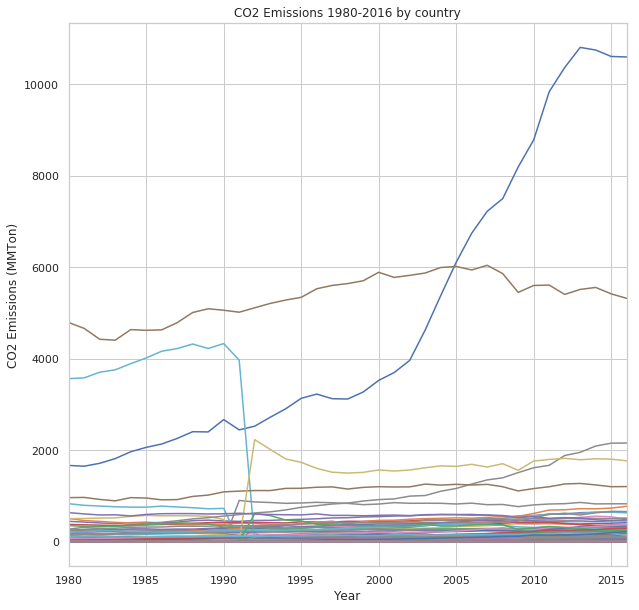

In [15]:
# plot the CO2 emissions of every country. This plot is meant to only demonstrate general trends in CO2 emissions (i.e consumption).
# where emissions drop to zero in the plot, note that this represents a lack of data
# emissions values of zero are not feasible. Values of zero correspond to unavailable data
# the viewer should note a general increasing CO2 emissions trend among global data

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

emissions_df.plot(figsize=[10,10],legend=False)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MMTon)')
plt.title('CO2 Emissions 1980-2016 by country')

##Plot developing country emissions dataframe

Text(0.5, 1.0, 'CO2 Emissions 1980-2016 by country')

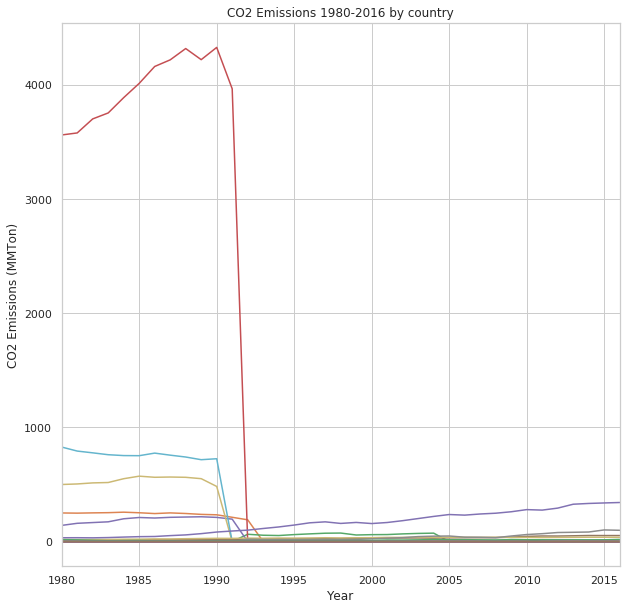

In [16]:
# plot the CO2 emissions of developing countries
# where the plots drop to zero corresponds to unavailable data
# the viewer should note an increase in CO2 emissions over time, where data is available

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

developing_emissions_df.plot(figsize=[10,10],legend=False)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MMTon)')
plt.title('CO2 Emissions 1980-2016 by country')

##Plot developed country emissions dataframe

Text(0.5, 1.0, 'CO2 Emissions 1980-2016 by country')

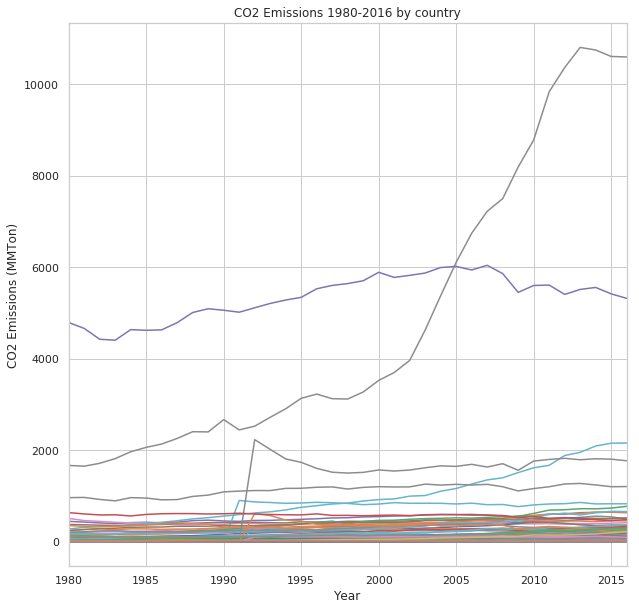

In [17]:
# plot the CO2 emissions of developed countries
# the viewer should note the increase in CO2 emissions over time
# compared to the developing country emissions plot, developed countries have emitted greater amounts of CO2 over time

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

developed_emissions_df.plot(figsize=[10,10],legend=False)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MMTon)')
plt.title('CO2 Emissions 1980-2016 by country')

#Electricity generation from renewable sources country-by-country

##Read in renewable energy consumption and reformat data frame

In [18]:
import numpy as np 
from numpy import zeros
import pandas as pd 
import re
from matplotlib import pyplot as plt
import numpy as np

# read in renewable energy data. The file provides electric energy generated from renewable sources country by country from 1980-2016 in billion kWh
df5=pd.read_csv('/content/drive/My Drive/renewable_data.csv')

# drop extraneous rows and label country column
df5_trim1=df5.drop([0,1,2], axis=0)
df5_trim2=df5_trim1.rename(columns={"Unnamed: 1": "Country"})

# drop extraneous columns and rename columns by year
df5_trim3=df5_trim2.drop('International_data',axis=1)
df5_trim4=df5_trim3.rename(\
                          columns={\
                                   
                                  "Unnamed: 2":"Unit",\
                                  "Unnamed: 3":"1980",\
                                  "Unnamed: 4":"1981",\
                                  "Unnamed: 5":"1982",\
                                  "Unnamed: 6":"1983",\
                                  "Unnamed: 7":"1984",\
                                  "Unnamed: 8":"1985",\
                                  "Unnamed: 9":"1986",\
                                  "Unnamed: 10":"1987",\
                                  "Unnamed: 11":"1988",\
                                  "Unnamed: 12":"1989",\
                                  "Unnamed: 13":"1990",\
                                  "Unnamed: 14":"1991",\
                                  "Unnamed: 15":"1992",\
                                  "Unnamed: 16":"1993",\
                                  "Unnamed: 17":"1994",\
                                  "Unnamed: 18":"1995",\
                                  "Unnamed: 19":"1996",\
                                  "Unnamed: 20":"1997",\
                                  "Unnamed: 21":"1998",\
                                  "Unnamed: 22":"1999",\
                                  "Unnamed: 23":"2000",\
                                  "Unnamed: 24":"2001",\
                                  "Unnamed: 25":"2002",\
                                  "Unnamed: 26":"2003",\
                                  "Unnamed: 27":"2004",\
                                  "Unnamed: 28":"2005",\
                                  "Unnamed: 29":"2006",\
                                  "Unnamed: 30":"2007",\
                                  "Unnamed: 31":"2008",\
                                  "Unnamed: 32":"2009",\
                                  "Unnamed: 33":"2010",\
                                  "Unnamed: 34":"2011",\
                                  "Unnamed: 35":"2012",\
                                  "Unnamed: 36":"2013",\
                                  "Unnamed: 37":"2014",\
                                  "Unnamed: 38":"2015",\
                                  "Unnamed: 39":"2016"})
# drop extraneous rows
df5_trim5=df5_trim4.drop([3,4,5,6,7],axis=0)
df5_trim6=df5_trim5.drop(['Unit'],axis=1)
df5_trim7=df5_trim6.reset_index()
df5_trim8=df5_trim7.drop(['index'],axis=1)
renewable_data=df5_trim8

# fill NA values with zero for plotting purposes
renewable_data['1980']=renewable_data['1980'].fillna(0)
renewable_data['1981']=renewable_data['1981'].fillna(0)
renewable_data['1982']=renewable_data['1982'].fillna(0)
renewable_data['1983']=renewable_data['1983'].fillna(0)
renewable_data['1984']=renewable_data['1984'].fillna(0)
renewable_data['1985']=renewable_data['1985'].fillna(0)
renewable_data['1986']=renewable_data['1986'].fillna(0)
renewable_data['1987']=renewable_data['1987'].fillna(0)
renewable_data['1988']=renewable_data['1988'].fillna(0)
renewable_data['1989']=renewable_data['1989'].fillna(0)
renewable_data['1990']=renewable_data['1990'].fillna(0)
renewable_data['1991']=renewable_data['1991'].fillna(0)
renewable_data['1992']=renewable_data['1992'].fillna(0)
renewable_data['1993']=renewable_data['1993'].fillna(0)
renewable_data['1994']=renewable_data['1994'].fillna(0)
renewable_data['1995']=renewable_data['1995'].fillna(0)
renewable_data['1996']=renewable_data['1996'].fillna(0)
renewable_data['1997']=renewable_data['1997'].fillna(0)
renewable_data['1998']=renewable_data['1998'].fillna(0)
renewable_data['1999']=renewable_data['1999'].fillna(0)
renewable_data['2000']=renewable_data['2000'].fillna(0)
renewable_data['2001']=renewable_data['2001'].fillna(0)
renewable_data['2002']=renewable_data['2002'].fillna(0)
renewable_data['2003']=renewable_data['2003'].fillna(0)
renewable_data['2004']=renewable_data['2004'].fillna(0)
renewable_data['2005']=renewable_data['2005'].fillna(0)
renewable_data['2006']=renewable_data['2006'].fillna(0)
renewable_data['2007']=renewable_data['2007'].fillna(0)
renewable_data['2008']=renewable_data['2008'].fillna(0)
renewable_data['2009']=renewable_data['2009'].fillna(0)
renewable_data['2010']=renewable_data['2010'].fillna(0)
renewable_data['2011']=renewable_data['2011'].fillna(0)
renewable_data['2012']=renewable_data['2012'].fillna(0)
renewable_data['2013']=renewable_data['2013'].fillna(0)
renewable_data['2014']=renewable_data['2014'].fillna(0)
renewable_data['2015']=renewable_data['2015'].fillna(0)
renewable_data['2016']=renewable_data['2016'].fillna(0)
renewable_data

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,0.711,0.721,0.707,0.746,0.757,0.77,0.713,0.756,0.744,...,0.748,0.54201,0.7761,0.7513,0.5953,0.738,0.834,0.927,1.022,1.061
1,Albania,2.919,3.018,3.093,3.167,3.241,3.315,3.365,3.979,3.713,...,2.76,3.759,5.201,7.6735,4.0368,4.7259,6.96,4.727,5.867,7.138
2,Algeria,0.248,0.362,0.474,0.233,0.516,0.639,0.247,0.491,0.181,...,0.224,0.28,0.303,0.1721,0.599,0.809,0.52,0.45,0.325,0.468
3,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,0.53,0.53,0.6,0.6,0.6,0.6,0.66,0.66,0.66,...,2.472,3.103,3.063,3.676,3.978,3.748,4.734,5.044,5.2,5.93
5,Antarctica,0,0,0,0,0,0,0,0,0,...,0.002,0.002,0.004,0.004,0.004,0.0005,0.0005,0.0005,0.001,0.001
6,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0002,0.0005,0.0005,0.0006,0.0006,0.005,0.006
7,Argentina,17.413,16.482,18.887,18.507,20.556,20.54,20.899,21.723,14.983,...,32.8841,31.7311,34.9291,35.4711,33.403,31.744,35.388,34.824,36.42,31.633
8,Armenia,--,--,--,--,--,--,--,--,--,...,1.836975,1.78103,2.003,2.537,2.467,2.303,2.155,1.976,2.188,2.33
9,Aruba,--,--,--,--,--,--,0,0,0,...,0,0,0.03,0.1061,0.1135,0.137,0.153,0.16,0.175,0.139


##Create new dataframe of renewable energy consumption (Billion KWh) by country from 1980 to 2016

In [19]:
# rearrange trimmed dataframe above for plotting purposes

# create list of years
years3=[]
for i in range(1980,2019):
  years3.append(i)

# create list of countries
country_names=[]
for i in range(0,228):
  country_names.append(renewable_data.loc[i]['Country'])

# create array of renewable energy consumption 

# start with empty array to fill with renewable consumption data
country_renewable_list=[]
renewable_array=np.zeros([228,37])
v=0

# method: iterate through countries and store their renewable consumption data in the empty array
for i in range(0,228):
  country_renewable=renewable_data.iloc[i,1:40]
  for i in range(0,37):
    country_renewable_list.append(country_renewable[i])
    for n, i in enumerate(country_renewable_list):
      if i=='--' or i=='-':
        country_renewable_list[n]=0 
  renewable_array[v]=country_renewable_list
  country_renewable_list=[]
  v=v+1    

# create new dataframe
renewable_arrayT=np.transpose(renewable_array)

renewable_df=pd.DataFrame(renewable_arrayT,years,country_name)
renewable_df

,Afghanistan,Albania,Algeria,American Samoa,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Vanuatu,Venezuela,Vietnam,"Virgin Islands, U.S.","Virgin Islands, British",Wake Island,Western Sahara,Yemen,Zambia,Zimbabwe
1980,0.71100,2.9190,0.2480,0.0,0.530,0.0000,0.0000,17.41300,0.000000,0.0000,...,0.0000,14.438,1.188,0.0000,0.0000,0.0,0.0,0.000,9.010,3.966
1981,0.72100,3.0180,0.3620,0.0,0.530,0.0000,0.0000,16.48200,0.000000,0.0000,...,0.0000,14.933,1.287,0.0000,0.0000,0.0,0.0,0.000,9.676,4.072
1982,0.70700,3.0930,0.4740,0.0,0.600,0.0000,0.0000,18.88700,0.000000,0.0000,...,0.0000,15.834,1.337,0.0000,0.0000,0.0,0.0,0.000,9.913,3.568
1983,0.74600,3.1670,0.2330,0.0,0.600,0.0000,0.0000,18.50700,0.000000,0.0000,...,0.0000,18.308,1.386,0.0000,0.0000,0.0,0.0,0.000,9.930,3.695
1984,0.75700,3.2410,0.5160,0.0,0.600,0.0000,0.0000,20.55600,0.000000,0.0000,...,0.0000,19.460,1.460,0.0000,0.0000,0.0,0.0,0.000,9.783,3.422
1985,0.77000,3.3150,0.6390,0.0,0.600,0.0000,0.0000,20.54000,0.000000,0.0000,...,0.0000,21.825,1.510,0.0000,0.0000,0.0,0.0,0.000,9.852,3.065
1986,0.71300,3.3650,0.2470,0.0,0.660,0.0000,0.0000,20.89900,0.000000,0.0000,...,0.0000,24.907,1.584,0.0000,0.0000,0.0,0.0,0.000,9.695,3.122
1987,0.75600,3.9790,0.4910,0.0,0.660,0.0000,0.0000,21.72300,0.000000,0.0000,...,0.0000,30.535,1.658,0.0000,0.0000,0.0,0.0,0.000,8.353,2.480
1988,0.74400,3.7130,0.1810,0.0,0.660,0.0000,0.0000,14.98300,0.000000,0.0000,...,0.0000,33.861,1.767,0.0000,0.0000,0.0,0.0,0.000,8.291,2.659
1989,0.75000,3.8460,0.2630,0.0,0.667,0.0000,0.0000,12.93500,0.000000,0.0000,...,0.0000,34.319,3.758,0.0000,0.0000,0.0,0.0,0.000,6.702,3.369


##Plot renewable dataframe

Text(0.5, 1.0, 'Renewable Energy Consumption 1980-2016 by country')

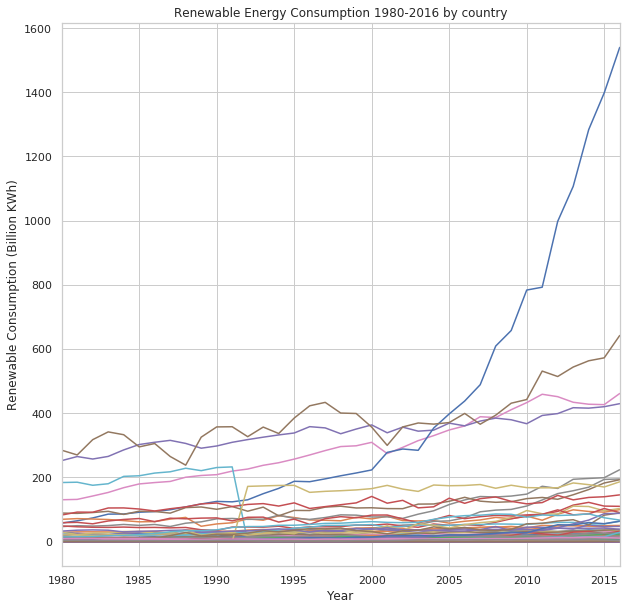

In [20]:
# plot renewable energy consumption data for every country
# this plot is meant to show general trends in renewable energy generation
# the viewer should note a general global increase in renewable energy generation, and therefore consumption

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

renewable_df.plot(figsize=[10,10],legend=False)
plt.xlabel('Year')
plt.ylabel('Renewable Consumption (Billion KWh)')
plt.title('Renewable Energy Consumption 1980-2016 by country')

##Create renewable dataframe of developing countries

In [21]:
# create array of developing countries renewable data

# start with empty array to fill with renewable energy data
developing_rearray=np.zeros([76,37])
developing_country_renewable_list=[]
s=0

# method: iterate through developing countries and store their renewable energy generation data in the empy array
for i in range(0,76):
  index=developing_country_idx[i]
  developing_country_renewable=renewable_data.iloc[index,1:38]
  for i in range(0,37):
    developing_country_renewable_list.append(developing_country_renewable[i])
    for n, i in enumerate(developing_country_renewable_list):
      if i=='--' or i=='-':
        developing_country_renewable_list[n]=0 
  developing_rearray[s]=developing_country_renewable_list
  developing_country_renewable_list=[]
  s=s+1 

# create new dataframe
developing_rearrayT=np.transpose(developing_rearray)

developing_renewable_df=pd.DataFrame(developing_rearrayT,years2,developing_country_list)
developing_renewable_df  

,American Samoa,Antarctica,Antigua and Barbuda,Aruba,"Bahamas, The",Barbados,Belize,Bermuda,Bhutan,Burundi,...,Togo,Turkmenistan,Turks and Caicos Islands,U.S. Pacific Islands,U.S. Territories,Vanuatu,"Virgin Islands, U.S.","Virgin Islands, British",Wake Island,Western Sahara
1980,0.0,0.0000,0.0000,0.0000,0.0000,0.000,0.040000,0.0,0.0060,0.0020,...,0.0,0.0,0.0,0.000,0.0,0.0000,0.0000,0.0000,0.0,0.0
1981,0.0,0.0000,0.0000,0.0000,0.0000,0.000,0.040000,0.0,0.0070,0.0020,...,0.0,0.0,0.0,0.000,0.0,0.0000,0.0000,0.0000,0.0,0.0
1982,0.0,0.0000,0.0000,0.0000,0.0000,0.000,0.040000,0.0,0.0080,0.0020,...,0.0,0.0,0.0,0.000,0.0,0.0000,0.0000,0.0000,0.0,0.0
1983,0.0,0.0000,0.0000,0.0000,0.0000,0.000,0.040000,0.0,0.0080,0.0230,...,0.0,0.0,0.0,0.000,0.0,0.0000,0.0000,0.0000,0.0,0.0
1984,0.0,0.0000,0.0000,0.0000,0.0000,0.000,0.040000,0.0,0.0080,0.0390,...,0.0,0.0,0.0,0.000,0.0,0.0000,0.0000,0.0000,0.0,0.0
1985,0.0,0.0000,0.0000,0.0000,0.0000,0.000,0.040000,0.0,0.0080,0.0460,...,0.0,0.0,0.0,0.016,0.0,0.0000,0.0000,0.0000,0.0,0.0
1986,0.0,0.0000,0.0000,0.0000,0.0000,0.000,0.040000,0.0,0.3000,0.0610,...,0.0,0.0,0.0,0.030,0.0,0.0000,0.0000,0.0000,0.0,0.0
1987,0.0,0.0000,0.0000,0.0000,0.0000,0.000,0.040000,0.0,1.1680,0.0940,...,0.0,0.0,0.0,0.030,0.0,0.0000,0.0000,0.0000,0.0,0.0
1988,0.0,0.0000,0.0000,0.0000,0.0000,0.000,0.040000,0.0,1.5290,0.1030,...,0.0,0.0,0.0,0.030,0.0,0.0000,0.0000,0.0000,0.0,0.0
1989,0.0,0.0000,0.0000,0.0000,0.0000,0.000,0.040000,0.0,1.5290,0.1020,...,0.0,0.0,0.0,0.030,0.0,0.0000,0.0000,0.0000,0.0,0.0


##Create renewable dataframe of developed countries

In [22]:
# create array of developed countries renewable data

# start with empty array to fill with renewable energy generation data
developed_rearray=np.zeros([152,37])
developed_country_renewable_list=[]
s=0

# method: iterate through developed countries and store their renewable data in the empty array
for i in range(0,152):
  index=developed_country_idx[i]
  developed_country_renewable=renewable_data.iloc[index,1:38]
  for i in range(0,37):
    developed_country_renewable_list.append(developed_country_renewable[i])
    for n, i in enumerate(developed_country_renewable_list):
      if i=='--' or i=='-':
        developed_country_renewable_list[n]=0 
  developed_rearray[s]=developed_country_renewable_list
  developed_country_renewable_list=[]
  s=s+1 

# create new dataframe
developed_rearrayT=np.transpose(developed_rearray)

developed_renewable_df=pd.DataFrame(developed_rearrayT,years2,developed_country_list)
developed_renewable_df 

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1980,0.71100,2.9190,0.2480,0.530,17.41300,0.000000,13.2140,28.8090,0.000,0.0000,...,0.000,3.921,284.688332,2.249,0.000,14.438,1.188,0.000,9.010,3.966
1981,0.72100,3.0180,0.3620,0.530,16.48200,0.000000,14.3350,30.3230,0.000,0.0000,...,0.000,4.369,269.898656,2.520,0.000,14.933,1.287,0.000,9.676,4.072
1982,0.70700,3.0930,0.4740,0.600,18.88700,0.000000,13.9610,30.3980,0.000,0.0000,...,0.000,4.543,317.537797,2.421,0.000,15.834,1.337,0.000,9.913,3.568
1983,0.74600,3.1670,0.2330,0.600,18.50700,0.000000,12.4110,30.1040,0.000,0.0000,...,0.000,4.548,341.747236,7.115,0.000,18.308,1.386,0.000,9.930,3.695
1984,0.75700,3.2410,0.5160,0.600,20.55600,0.000000,12.3750,29.1450,0.000,0.0000,...,0.000,3.993,332.949558,7.033,0.000,19.460,1.460,0.000,9.783,3.422
1985,0.77000,3.3150,0.6390,0.600,20.54000,0.000000,13.9290,31.1700,0.000,0.0000,...,0.000,4.081,295.035032,6.384,0.000,21.825,1.510,0.000,9.852,3.065
1986,0.71300,3.3650,0.2470,0.660,20.89900,0.000000,14.7720,31.4200,0.000,0.0000,...,0.000,4.768,305.508137,7.217,0.000,24.907,1.584,0.000,9.695,3.122
1987,0.75600,3.9790,0.4910,0.660,21.72300,0.000000,13.8630,26.2570,0.000,0.0000,...,0.000,6.295,265.122621,7.186,0.000,30.535,1.658,0.000,8.353,2.480
1988,0.74400,3.7130,0.1810,0.660,14.98300,0.000000,14.1100,36.1460,0.000,0.0000,...,0.000,6.204,238.085091,5.364,0.000,33.861,1.767,0.000,8.291,2.659
1989,0.75000,3.8460,0.2630,0.667,12.93500,0.000000,15.1110,35.6910,0.000,0.0000,...,0.000,6.095,325.360874,3.861,0.000,34.319,3.758,0.000,6.702,3.369


#Electricity generation from fossil fuels country-by-country

##Read in fossil fuel electricity generation data and reformat dataframe

In [23]:
import numpy as np 
from numpy import zeros
import pandas as pd 
import re
from matplotlib import pyplot as plt
import numpy as np

# read in fossil energy data. This file provides information about electric energy generated from fossil fuel sources from 1980-2016 in billion kWh
df7=pd.read_csv('/content/drive/My Drive/fossil_fuel_kwh.csv')

# drop extraneous rows and label country column
df7_trim1=df7.drop([0,1,2], axis=0)
df7_trim2=df7_trim1.rename(columns={"Unnamed: 1": "Country"})

# drop extraneous columns and rename relevant columns by year
df7_trim3=df7_trim2.drop('International_data',axis=1)
df7_trim4=df7_trim3.rename(\
                          columns={\
                                   
                                  "Unnamed: 2":"Unit",\
                                  "Unnamed: 3":"1980",\
                                  "Unnamed: 4":"1981",\
                                  "Unnamed: 5":"1982",\
                                  "Unnamed: 6":"1983",\
                                  "Unnamed: 7":"1984",\
                                  "Unnamed: 8":"1985",\
                                  "Unnamed: 9":"1986",\
                                  "Unnamed: 10":"1987",\
                                  "Unnamed: 11":"1988",\
                                  "Unnamed: 12":"1989",\
                                  "Unnamed: 13":"1990",\
                                  "Unnamed: 14":"1991",\
                                  "Unnamed: 15":"1992",\
                                  "Unnamed: 16":"1993",\
                                  "Unnamed: 17":"1994",\
                                  "Unnamed: 18":"1995",\
                                  "Unnamed: 19":"1996",\
                                  "Unnamed: 20":"1997",\
                                  "Unnamed: 21":"1998",\
                                  "Unnamed: 22":"1999",\
                                  "Unnamed: 23":"2000",\
                                  "Unnamed: 24":"2001",\
                                  "Unnamed: 25":"2002",\
                                  "Unnamed: 26":"2003",\
                                  "Unnamed: 27":"2004",\
                                  "Unnamed: 28":"2005",\
                                  "Unnamed: 29":"2006",\
                                  "Unnamed: 30":"2007",\
                                  "Unnamed: 31":"2008",\
                                  "Unnamed: 32":"2009",\
                                  "Unnamed: 33":"2010",\
                                  "Unnamed: 34":"2011",\
                                  "Unnamed: 35":"2012",\
                                  "Unnamed: 36":"2013",\
                                  "Unnamed: 37":"2014",\
                                  "Unnamed: 38":"2015",\
                                  "Unnamed: 39":"2016"})
# drop extraneous rows/columns
df7_trim5=df7_trim4.drop([3,4,5,6],axis=0)
df7_trim6=df7_trim5.drop(['Unit'],axis=1)
df7_trim7=df7_trim6.reset_index()
df7_trim8=df7_trim7.drop(['index'],axis=1)
fossil_data=df7_trim8

# fill NA values with zero for plotting purposes
fossil_data['1980']=fossil_data['1980'].fillna(0)
fossil_data['1981']=fossil_data['1981'].fillna(0)
fossil_data['1982']=fossil_data['1982'].fillna(0)
fossil_data['1983']=fossil_data['1983'].fillna(0)
fossil_data['1984']=fossil_data['1984'].fillna(0)
fossil_data['1985']=fossil_data['1985'].fillna(0)
fossil_data['1986']=fossil_data['1986'].fillna(0)
fossil_data['1987']=fossil_data['1987'].fillna(0)
fossil_data['1988']=fossil_data['1988'].fillna(0)
fossil_data['1989']=fossil_data['1989'].fillna(0)
fossil_data['1990']=fossil_data['1990'].fillna(0)
fossil_data['1991']=fossil_data['1991'].fillna(0)
fossil_data['1992']=fossil_data['1992'].fillna(0)
fossil_data['1993']=fossil_data['1993'].fillna(0)
fossil_data['1994']=fossil_data['1994'].fillna(0)
fossil_data['1995']=fossil_data['1995'].fillna(0)
fossil_data['1996']=fossil_data['1996'].fillna(0)
fossil_data['1997']=fossil_data['1997'].fillna(0)
fossil_data['1998']=fossil_data['1998'].fillna(0)
fossil_data['1999']=fossil_data['1999'].fillna(0)
fossil_data['2000']=fossil_data['2000'].fillna(0)
fossil_data['2001']=fossil_data['2001'].fillna(0)
fossil_data['2002']=fossil_data['2002'].fillna(0)
fossil_data['2003']=fossil_data['2003'].fillna(0)
fossil_data['2004']=fossil_data['2004'].fillna(0)
fossil_data['2005']=fossil_data['2005'].fillna(0)
fossil_data['2006']=fossil_data['2006'].fillna(0)
fossil_data['2007']=fossil_data['2007'].fillna(0)
fossil_data['2008']=fossil_data['2008'].fillna(0)
fossil_data['2009']=fossil_data['2009'].fillna(0)
fossil_data['2010']=fossil_data['2010'].fillna(0)
fossil_data['2011']=fossil_data['2011'].fillna(0)
fossil_data['2012']=fossil_data['2012'].fillna(0)
fossil_data['2013']=fossil_data['2013'].fillna(0)
fossil_data['2014']=fossil_data['2014'].fillna(0)
fossil_data['2015']=fossil_data['2015'].fillna(0)
fossil_data['2016']=fossil_data['2016'].fillna(0)
fossil_data

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,0.942,0.992,0.952,1,1.019,1.034,1.135,1.218,1.08,...,0.946,0.72801,0.9381,0.9363,0.8473,0.912,1.052,1.081,1.166,1.211
1,Albania,3.635,3.673,3.692,3.71,3.737,3.783,3.814,4.236,3.93,...,2.82768,3.759,5.201,7.67444,4.09226,4.7259,6.96,4.727,5.867,7.138
2,Algeria,6.683,7.65,8.824,9.615,10.537,11.569,12.214,13.014,14.08,...,34.9758,37.83582,36.206,42.9985,48.27768,54.1775,56.5064,60.59872,64.78644,66.89122
3,American Samoa,0.07,0.067,0.067,0.071,0.069,0.083,0.075,0.081,0.091,...,0.184,0.187,0.178,0.159,0.155,0.157,0.156,0.156,0.163,0.169
4,Angola,0.905,0.906,0.995,1.028,1.028,1.028,1.088,1.097,1.097,...,3.1488,4.06368,4.60554,5.31724,5.52336,6.03408,7.97606,9.21666,9.49768,10.20324
5,Antarctica,0,0,0,0,0,0,0,0,0,...,0.002,0.002,0.004,0.004,0.004,0.0005,0.0005,0.0005,0.001,0.001
6,Antigua and Barbuda,0.056,0.059,0.062,0.068,0.071,0.072,0.081,0.085,0.086,...,0.263,0.271,0.308,0.3192,0.3185,0.3105,0.3106,0.3166,0.325,0.331
7,Argentina,41.858,40.495,41.086,41.641,44.023,43.693,47.192,50.178,49.243,...,110.6431,114.54182,116.0151,119.29,115.5232,121.53224,124.59762,123.23304,133.81738,131.91028
8,Armenia,--,--,--,--,--,--,--,--,--,...,5.584465,5.46643,5.37776,6.17572,7.0706,7.62206,7.30562,7.33366,7.39194,6.95114
9,Aruba,--,--,--,--,--,--,0.274,0.299,0.308,...,0.88,0.859,0.899,0.9401,0.9315,0.915,0.943,0.938,0.965,0.939


##Create new dataframe of fossil fuel generation

In [24]:
# create list of years
years3=[]
for i in range(1980,2017):
  years3.append(i)

# create list of countries
country_nameff=[]
for i in range(0,228):
  country_nameff.append(fossil_data.loc[i]['Country'])

# create data of fossil fuel energy generation

# start with empty array to fill in with fossil fuel generation data
country_fossil_list=[]
fossil_array=np.zeros([228,37])
r=0

# method: iterate through countries and store fossil fuel energy generation data in empty array
for i in range(0,228):
  country_fossil=fossil_data.iloc[i,1:40]
  for i in range(0,37):
    country_fossil_list.append(country_fossil[i])
    for n, i in enumerate(country_fossil_list):
      if i=='--' or i=='-':
        country_fossil_list[n]=0 
  fossil_array[r]=country_fossil_list
  country_fossil_list=[]
  r=r+1    

# create new dataframe
fossil_arrayT=np.transpose(fossil_array)

fossil_df=pd.DataFrame(fossil_arrayT,years3,country_nameff)
fossil_df

,Afghanistan,Albania,Algeria,American Samoa,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Vanuatu,Venezuela,Vietnam,"Virgin Islands, U.S.","Virgin Islands, British",Wake Island,Western Sahara,Yemen,Zambia,Zimbabwe
1980,0.94200,3.63500,6.68300,0.070,0.90500,0.0000,0.0560,41.85800,0.000000,0.0000,...,0.019000,32.01200,3.91400,0.749000,0.022000,0.0,0.072,0.47100,9.17200,4.46500
1981,0.99200,3.67300,7.65000,0.067,0.90600,0.0000,0.0590,40.49500,0.000000,0.0000,...,0.020000,35.95700,4.20100,0.791000,0.024000,0.0,0.072,0.54000,9.80900,4.47600
1982,0.95200,3.69200,8.82400,0.067,0.99500,0.0000,0.0620,41.08600,0.000000,0.0000,...,0.021000,38.27400,4.43900,0.801000,0.025000,0.0,0.073,0.64700,10.02400,4.09700
1983,1.00000,3.71000,9.61500,0.071,1.02800,0.0000,0.0680,41.64100,0.000000,0.0000,...,0.023000,41.80100,4.67600,0.823000,0.024000,0.0,0.073,0.72100,10.05100,4.38700
1984,1.01900,3.73700,10.53700,0.069,1.02800,0.0000,0.0710,44.02300,0.000000,0.0000,...,0.024000,42.64500,4.93800,0.827000,0.027000,0.0,0.073,0.81800,9.91200,4.50200
1985,1.03400,3.78300,11.56900,0.083,1.02800,0.0000,0.0720,43.69300,0.000000,0.0000,...,0.025000,46.22000,5.17600,0.846000,0.029000,0.0,0.071,0.85500,9.95800,4.99200
1986,1.13500,3.81400,12.21400,0.075,1.08800,0.0000,0.0810,47.19200,0.000000,0.2740,...,0.025000,48.36300,5.34400,0.865000,0.033000,0.0,0.074,1.09400,9.81100,5.95500
1987,1.21800,4.23600,13.01400,0.081,1.09700,0.0000,0.0850,50.17800,0.000000,0.2990,...,0.024000,52.42700,5.60600,0.905000,0.037000,0.0,0.076,1.18300,8.45500,7.71800
1988,1.08000,3.93000,14.08000,0.091,1.09700,0.0000,0.0860,49.24300,0.000000,0.3080,...,0.024000,56.46000,6.27700,0.912000,0.040000,0.0,0.077,1.56500,8.39600,8.02300
1989,1.08900,4.08100,14.44900,0.090,1.10400,0.0000,0.0880,48.01000,0.000000,0.3340,...,0.024000,55.89600,7.50700,0.893000,0.041000,0.0,0.078,1.57900,6.77700,8.74900


##Create fossil fuel data frame for developing countries

In [29]:
# create empty array to fill with developing countries fossil data
developing_foarray=np.zeros([76,37])
developing_country_fossil_list=[]
s=0

# method: iterate through developing countries and store fossil fuel data in empty array
for i in range(0,76):
  index=developing_country_idx[i]
  developing_country_fossil=fossil_data.iloc[index,1:38]
  for i in range(0,37):
    developing_country_fossil_list.append(developing_country_fossil[i])
    for n, i in enumerate(developing_country_fossil_list):
      if i=='--' or i=='-':
        developing_country_fossil_list[n]=0 
  developing_foarray[s]=developing_country_fossil_list
  developing_country_fossil_list=[]
  s=s+1 

# create new dataframe
developing_foarrayT=np.transpose(developing_foarray)

developing_fossil_df=pd.DataFrame(developing_foarrayT,years2,developing_country_list)
developing_fossil_df 

,American Samoa,Antarctica,Antigua and Barbuda,Aruba,"Bahamas, The",Barbados,Belize,Bermuda,Bhutan,Burundi,...,Togo,Turkmenistan,Turks and Caicos Islands,U.S. Pacific Islands,U.S. Territories,Vanuatu,"Virgin Islands, U.S.","Virgin Islands, British",Wake Island,Western Sahara
1980,0.070,0.0000,0.0560,0.0000,0.799000,0.3110,0.091000,0.311000,0.0160,0.0030,...,0.05000,0.00000,0.005,0.131,0.0,0.019000,0.749000,0.022000,0.0,0.072
1981,0.067,0.0000,0.0590,0.0000,0.714000,0.3270,0.092000,0.320000,0.0200,0.0040,...,0.05300,0.00000,0.005,0.136,0.0,0.020000,0.791000,0.024000,0.0,0.072
1982,0.067,0.0000,0.0620,0.0000,0.762000,0.3320,0.093000,0.331000,0.0220,0.0040,...,0.07800,0.00000,0.005,0.136,0.0,0.021000,0.801000,0.025000,0.0,0.073
1983,0.071,0.0000,0.0680,0.0000,0.819000,0.3530,0.095000,0.345000,0.0220,0.0250,...,0.05300,0.00000,0.005,0.139,0.0,0.023000,0.823000,0.024000,0.0,0.073
1984,0.069,0.0000,0.0710,0.0000,0.814000,0.3600,0.103000,0.358000,0.0200,0.0410,...,0.07400,0.00000,0.005,0.140,0.0,0.024000,0.827000,0.027000,0.0,0.073
1985,0.083,0.0000,0.0720,0.0000,0.846000,0.3670,0.107000,0.370000,0.0110,0.0470,...,0.10900,0.00000,0.005,0.155,0.0,0.025000,0.846000,0.029000,0.0,0.071
1986,0.075,0.0000,0.0810,0.2740,0.851000,0.3800,0.110000,0.387000,0.3040,0.0620,...,0.10500,0.00000,0.005,0.159,0.0,0.025000,0.865000,0.033000,0.0,0.074
1987,0.081,0.0000,0.0850,0.2990,0.853000,0.4000,0.115000,0.409000,1.1700,0.0950,...,0.10900,0.00000,0.005,0.158,0.0,0.024000,0.905000,0.037000,0.0,0.076
1988,0.091,0.0000,0.0860,0.3080,0.855000,0.4230,0.125000,0.431000,1.5320,0.1040,...,0.11600,0.00000,0.005,0.168,0.0,0.024000,0.912000,0.040000,0.0,0.077
1989,0.090,0.0000,0.0880,0.3340,0.870000,0.4150,0.129000,0.438000,1.5330,0.1030,...,0.12600,0.00000,0.010,0.188,0.0,0.024000,0.893000,0.041000,0.0,0.078


##Create fossil fuel dataframe for developed countries

In [25]:
# create empty array to fill with developed countries fossil data
developed_foarray=np.zeros([152,37])
developed_country_fossil_list=[]
s=0

# method: iterate through developed countries and store fossil fuel data in empty array
for i in range(0,152):
  index=developed_country_idx[i]
  developed_country_fossil=fossil_data.iloc[index,1:38]
  for i in range(0,37):
    developed_country_fossil_list.append(developed_country_fossil[i])
    for n, i in enumerate(developed_country_fossil_list):
      if i=='--' or i=='-':
        developed_country_fossil_list[n]=0 
  developed_foarray[s]=developed_country_fossil_list
  developed_country_fossil_list=[]
  s=s+1 

# create new dataframe
developed_foarrayT=np.transpose(developed_foarray)

developed_fossil_df=pd.DataFrame(developed_foarrayT,years2,developed_country_list)
developed_fossil_df 

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1980,0.94200,3.63500,6.68300,0.90500,41.85800,0.000000,87.39300,40.57400,0.00000,1.55400,...,5.89700,264.91800,2289.600789,3.26200,0.00000,32.01200,3.91400,0.47100,9.17200,4.46500
1981,0.99200,3.67300,7.65000,0.90600,40.49500,0.000000,92.91100,41.23300,0.00000,1.69900,...,5.81500,258.79200,2297.973836,3.51000,0.00000,35.95700,4.20100,0.54000,9.80900,4.47600
1982,0.95200,3.69200,8.82400,0.99500,41.08600,0.000000,96.73600,41.45800,0.00000,1.88100,...,8.34900,253.86400,2244.372240,3.49500,0.00000,38.27400,4.43900,0.64700,10.02400,4.09700
1983,1.00000,3.71000,9.61500,1.02800,41.64100,0.000000,98.04800,41.19100,0.00000,2.08300,...,9.53300,257.11500,2313.445566,7.25800,0.00000,41.80100,4.67600,0.72100,10.05100,4.38700
1984,1.01900,3.73700,10.53700,1.02800,44.02300,0.000000,103.71600,40.97000,0.00000,2.27200,...,10.21500,261.70700,2419.465819,7.16100,0.00000,42.64500,4.93800,0.81800,9.91200,4.50200
1985,1.03400,3.78300,11.56900,1.02800,43.69300,0.000000,110.42500,43.03300,0.00000,2.76100,...,11.45400,274.56200,2473.002395,6.52500,0.00000,46.22000,5.17600,0.85500,9.95800,4.99200
1986,1.13500,3.81400,12.21400,1.08800,47.19200,0.000000,116.27200,43.29500,0.00000,3.01800,...,12.04600,279.07000,2490.470889,7.34400,0.00000,48.36300,5.34400,1.09400,9.81100,5.95500
1987,1.21800,4.23600,13.01400,1.09700,50.17800,0.000000,121.91500,38.84200,0.00000,3.11700,...,12.83900,283.49800,2575.287284,7.48200,0.00000,52.42700,5.60600,1.18300,8.45500,7.71800
1988,1.08000,3.93000,14.08000,1.09700,49.24300,0.000000,130.92000,47.49100,0.00000,3.27300,...,13.95000,288.31500,2707.411130,6.84700,0.00000,56.46000,6.27700,1.56500,8.39600,8.02300
1989,1.08900,4.08100,14.44900,1.10400,48.01000,0.000000,139.22100,48.42600,0.00000,3.28100,...,14.67500,294.58200,2963.344817,5.59700,0.00000,55.89600,7.50700,1.57900,6.77700,8.74900


#1. How does energy consumption relate to total GDP in both developing and developed countries?

##Plot developing country CO2 emissions and GDP
https://seaborn.pydata.org/examples/color_palettes.html

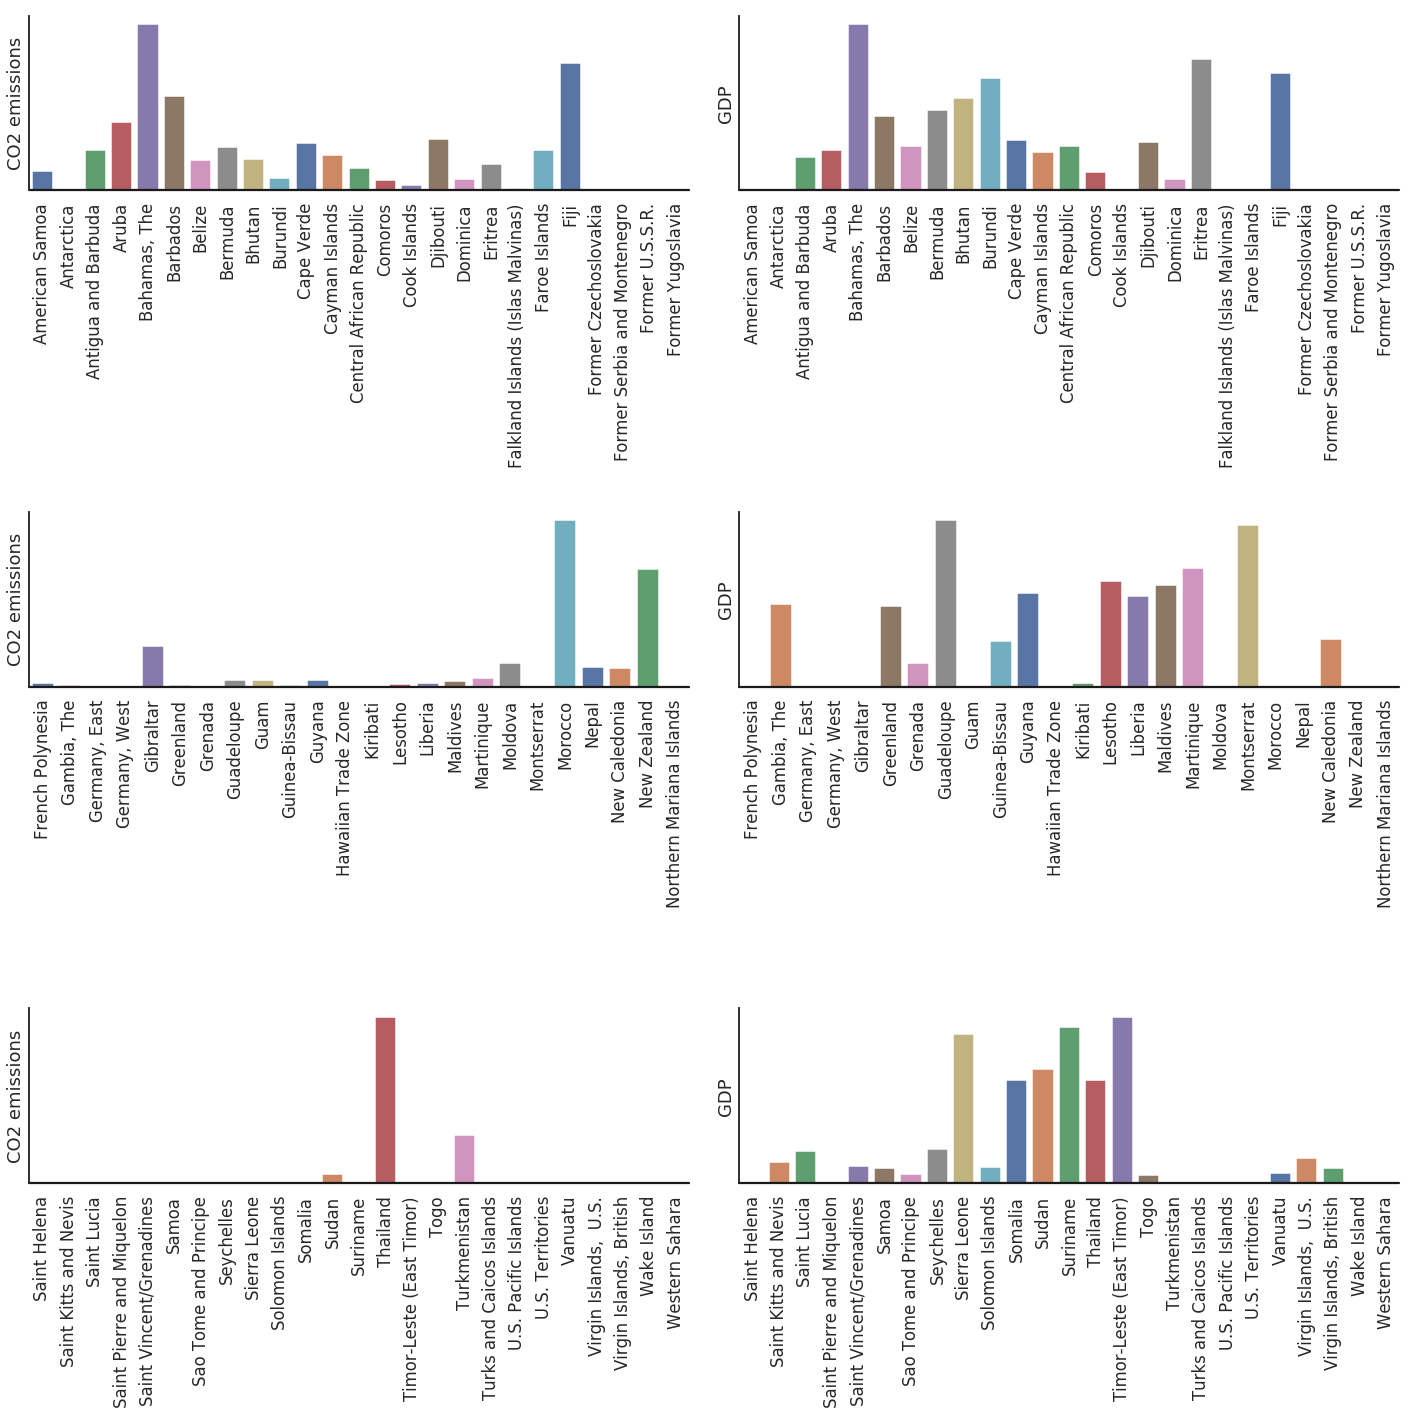

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")

# Because there is so much data, separate the plot into subplots for viewing purposes
developing_country_list1=developing_country_list[0:25]
developing_emissions1=developing_emissions_df.iloc[36,0:25]
developing_gdp1=developing_GDP_df.iloc[36,0:25]

developing_country_list2=developing_country_list[26:50]
developing_emissions2=developing_emissions_df.iloc[36,26:50]
developing_gdp2=developing_GDP_df.iloc[36,26:50]

developing_country_list3=developing_country_list[51:76]
developing_emissions3=developing_emissions_df.iloc[36,51:76]
developing_gdp3=developing_GDP_df.iloc[36,51:76]

# Set up first matplotlib figure
f, (axes) = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

# Plot first section of developing countries - emissions
x1 = developing_country_list1
y1 = developing_emissions1
sns.barplot(x=x1, y=y1, palette="deep", ax=axes[0][0])
axes[0][0].axhline(0, color="k", clip_on=False)
axes[0][0].set_ylabel("CO2 emissions")
axes[0][0].xaxis.set_visible(True)
for xtick in axes[0][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot first section of developing coutries - GDP

y12=developing_gdp1
sns.barplot(x=x1, y=y12, palette="deep", ax=axes[0][1])
axes[0][1].axhline(0, color="k", clip_on=False)
axes[0][1].set_ylabel("GDP")
axes[0][1].xaxis.set_visible(True)
for xtick in axes[0][1].get_xticklabels():
  xtick.set_rotation(90)


# Plot second section of developing coutries - emissions
x2=developing_country_list2
y2=developing_emissions2
sns.barplot(x=x2, y=y2, palette="deep", ax=axes[1][0])
axes[1][0].axhline(0, color="k", clip_on=False)
axes[1][0].set_ylabel("CO2 emissions")
axes[1][0].xaxis.set_visible(True)
for xtick in axes[1][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot second section of developing coutries - GDP

y22=developing_gdp2
sns.barplot(x=x2, y=y22, palette="deep", ax=axes[1][1])
axes[1][1].axhline(0, color="k", clip_on=False)
axes[1][1].set_ylabel("GDP")
axes[1][1].xaxis.set_visible(True)
for xtick in axes[1][1].get_xticklabels():
  xtick.set_rotation(90)

# Plot third section of developing countries - emissions
x3=developing_country_list3
y3=developing_emissions3
sns.barplot(x=x3, y=y3, palette="deep", ax=axes[2][0])
axes[2][0].axhline(0, color="k", clip_on=False)
axes[2][0].set_ylabel("CO2 emissions")
axes[2][0].xaxis.set_visible(True)
for xtick in axes[2][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot third section of developing coutries - GDP

y32=developing_gdp3
sns.barplot(x=x3, y=y32, palette="deep", ax=axes[2][1])
axes[2][1].axhline(0, color="k", clip_on=False)
axes[2][1].set_ylabel("GDP")
axes[2][1].xaxis.set_visible(True)
for xtick in axes[2][1].get_xticklabels():
  xtick.set_rotation(90)

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)


plt.show()

##Plot developed countries CO2 emissions and GDP

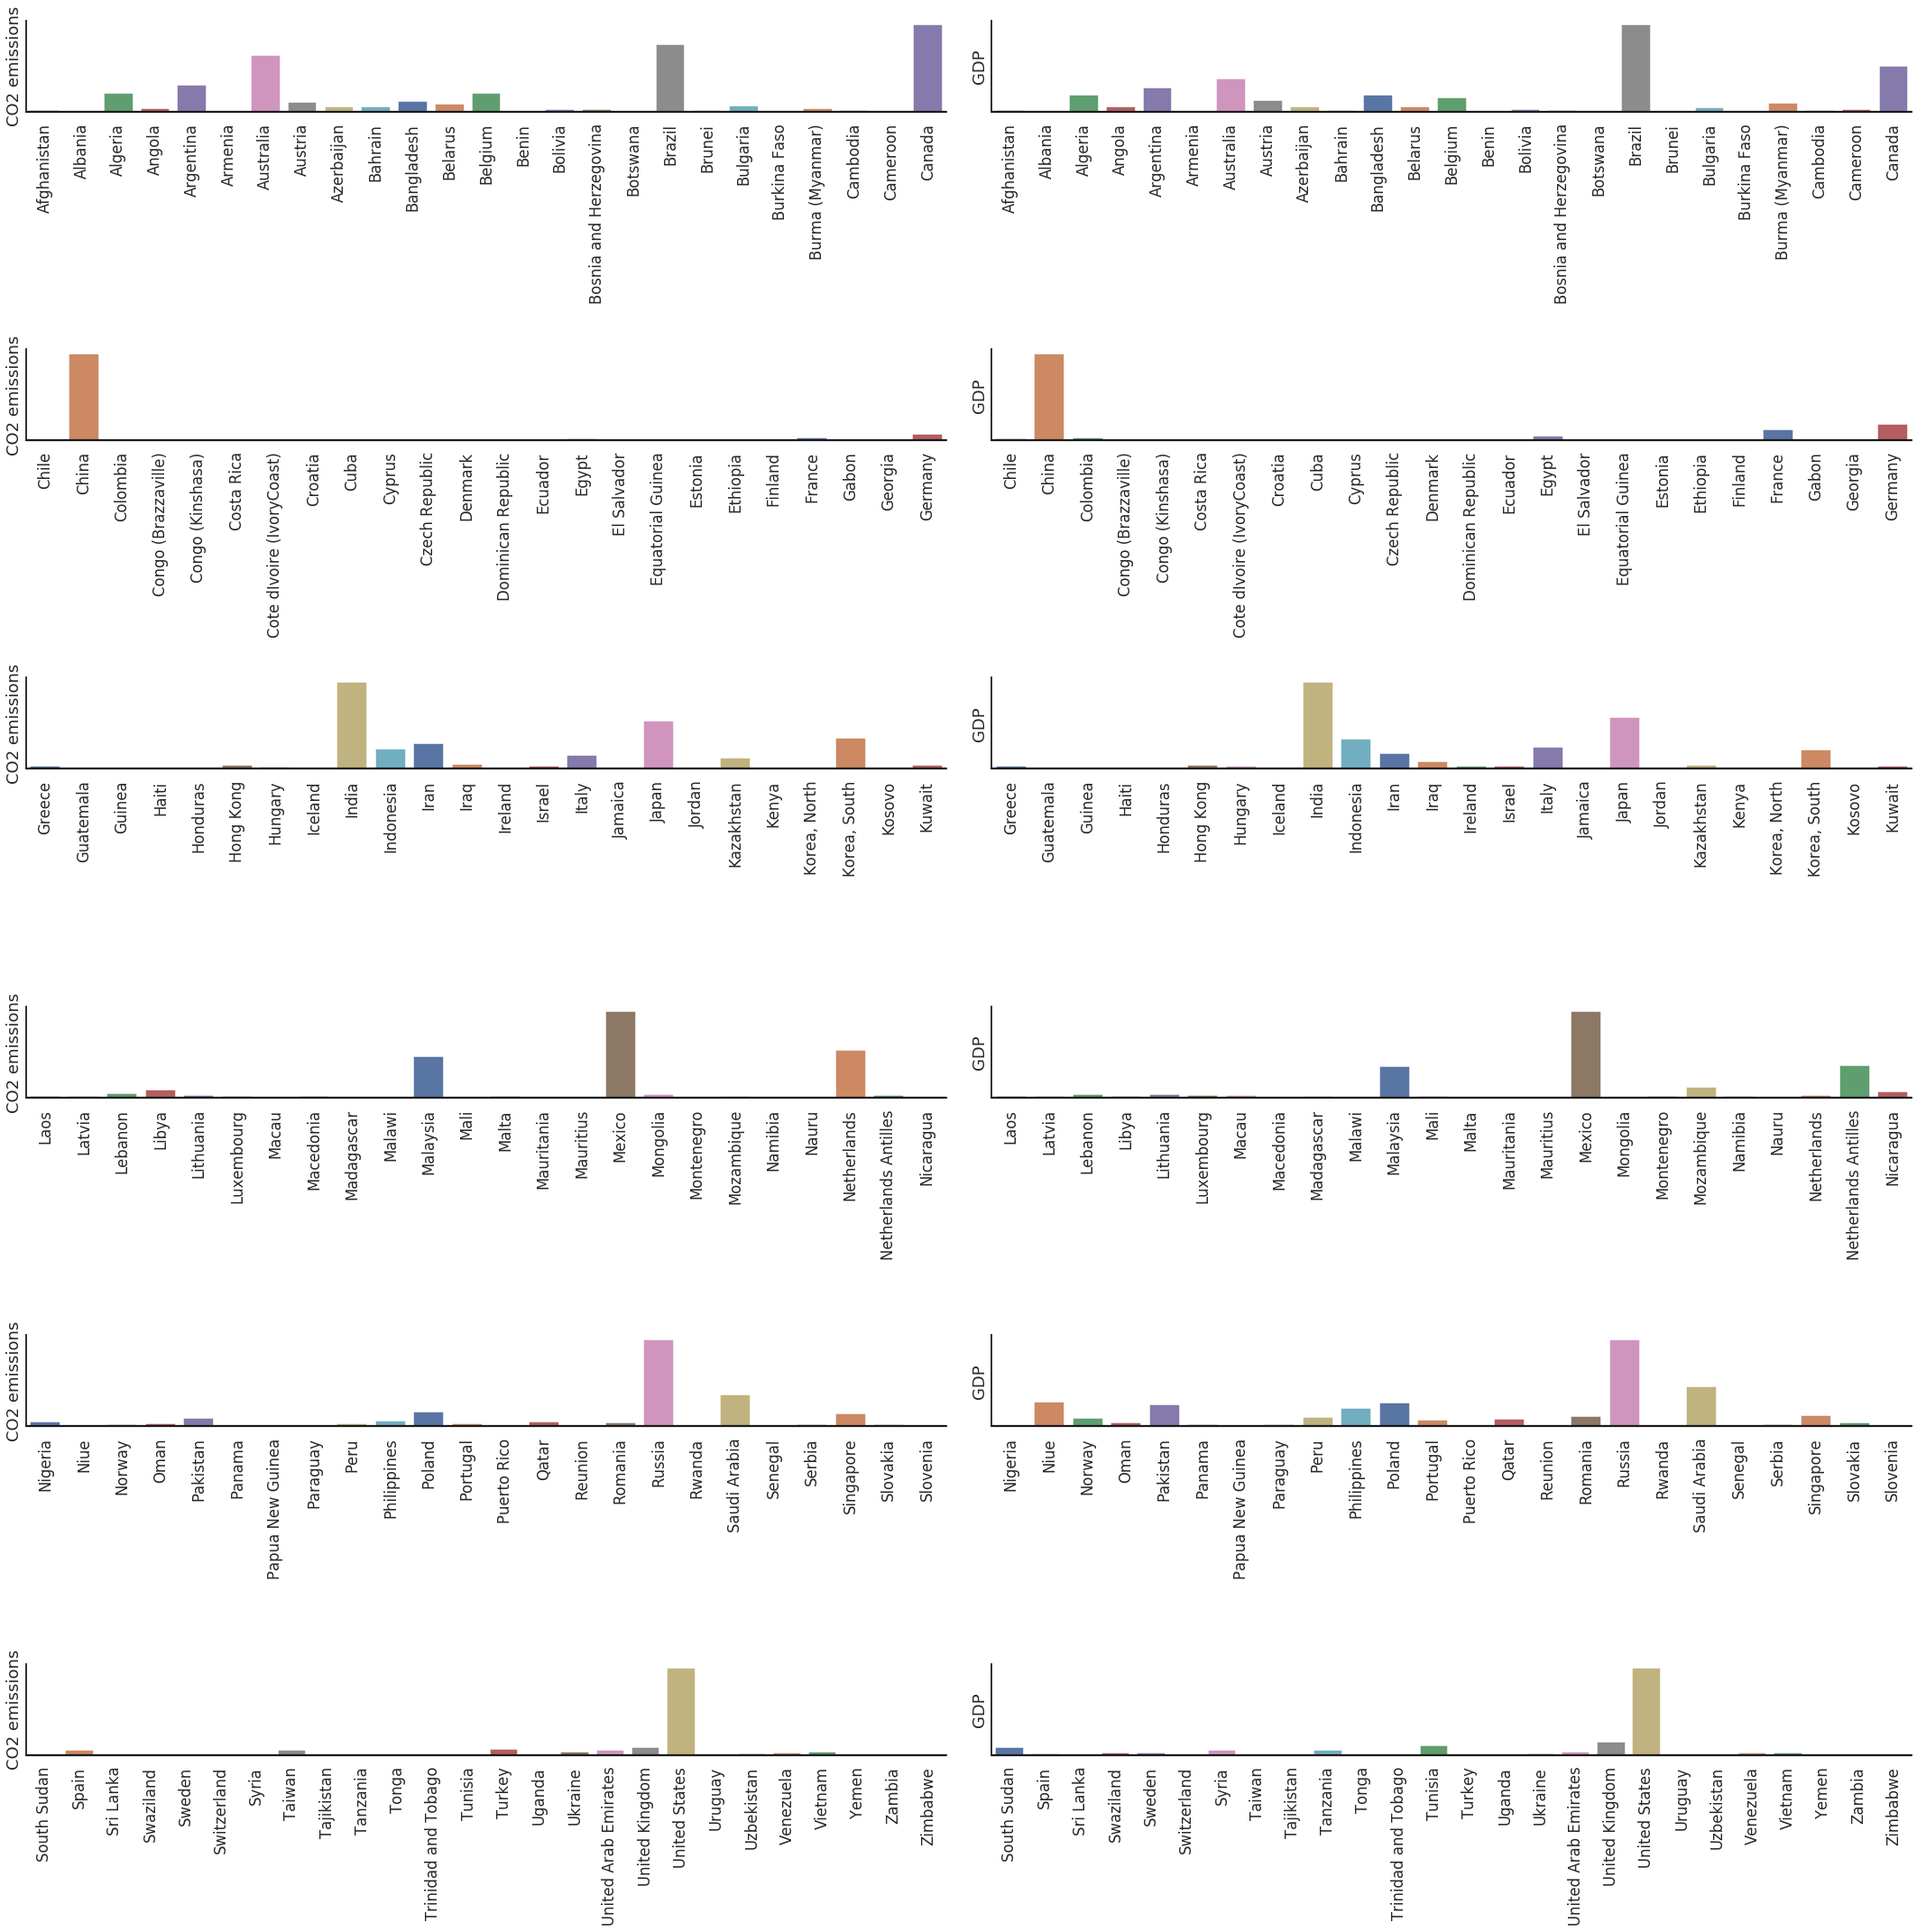

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")

# Because there is so much data, separate the plot into subplots for viewing purposes
developed_country_list1=developed_country_list[0:25]
developed_emissions1=developed_emissions_df.iloc[36,0:25]
developed_gdp1=developed_GDP_df.iloc[36,0:25]

developed_country_list2=developed_country_list[26:50]
developed_emissions2=developed_emissions_df.iloc[36,26:50]
developed_gdp2=developed_GDP_df.iloc[36,26:50]

developed_country_list3=developed_country_list[51:75]
developed_emissions3=developed_emissions_df.iloc[36,51:75]
developed_gdp3=developed_GDP_df.iloc[36,51:75]

developed_country_list4=developed_country_list[76:100]
developed_emissions4=developed_emissions_df.iloc[36,76:100]
developed_gdp4=developed_GDP_df.iloc[36,76:100]

developed_country_list5=developed_country_list[101:125]
developed_emissions5=developed_emissions_df.iloc[36,101:125]
developed_gdp5=developed_GDP_df.iloc[36,101:125]

developed_country_list6=developed_country_list[126:152]
developed_emissions6=developed_emissions_df.iloc[36,126:152]
developed_gdp6=developed_GDP_df.iloc[36,126:152]

# Set up first matplotlib figure
f, (axes) = plt.subplots(nrows=6, ncols=2, figsize=(30, 30))

# Plot first section of developing countries - emissions
x1 = developed_country_list1
y1 = developed_emissions1
sns.barplot(x=x1, y=y1, palette="deep", ax=axes[0][0])
axes[0][0].axhline(0, color="k", clip_on=False)
axes[0][0].set_ylabel("CO2 emissions")
axes[0][0].xaxis.set_visible(True)
for xtick in axes[0][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot first section of developing coutries - GDP

y12=developed_gdp1
sns.barplot(x=x1, y=y12, palette="deep", ax=axes[0][1])
axes[0][1].axhline(0, color="k", clip_on=False)
axes[0][1].set_ylabel("GDP")
axes[0][1].xaxis.set_visible(True)
for xtick in axes[0][1].get_xticklabels():
  xtick.set_rotation(90)


# Plot second section of developing coutries - emissions
x2=developed_country_list2
y2=developed_emissions2
sns.barplot(x=x2, y=y2, palette="deep", ax=axes[1][0])
axes[1][0].axhline(0, color="k", clip_on=False)
axes[1][0].set_ylabel("CO2 emissions")
axes[1][0].xaxis.set_visible(True)
for xtick in axes[1][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot second section of developing coutries - GDP

y22=developed_gdp2
sns.barplot(x=x2, y=y22, palette="deep", ax=axes[1][1])
axes[1][1].axhline(0, color="k", clip_on=False)
axes[1][1].set_ylabel("GDP")
axes[1][1].xaxis.set_visible(True)
for xtick in axes[1][1].get_xticklabels():
  xtick.set_rotation(90)

# Plot third section of developing countries - emissions
x3=developed_country_list3
y3=developed_emissions3
sns.barplot(x=x3, y=y3, palette="deep", ax=axes[2][0])
axes[2][0].axhline(0, color="k", clip_on=False)
axes[2][0].set_ylabel("CO2 emissions")
axes[2][0].xaxis.set_visible(True)
for xtick in axes[2][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot third section of developing coutries - GDP

y32=developed_gdp3
sns.barplot(x=x3, y=y32, palette="deep", ax=axes[2][1])
axes[2][1].axhline(0, color="k", clip_on=False)
axes[2][1].set_ylabel("GDP")
axes[2][1].xaxis.set_visible(True)
for xtick in axes[2][1].get_xticklabels():
  xtick.set_rotation(90)

# Plot fourth section of developing countries - emissions
x4 = developed_country_list4
y4 = developed_emissions4
sns.barplot(x=x4, y=y4, palette="deep", ax=axes[3][0])
axes[3][0].axhline(0, color="k", clip_on=False)
axes[3][0].set_ylabel("CO2 emissions")
axes[3][0].xaxis.set_visible(True)
for xtick in axes[3][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot fourth section of developing coutries - GDP

y42=developed_gdp4
sns.barplot(x=x4, y=y42, palette="deep", ax=axes[3][1])
axes[3][1].axhline(0, color="k", clip_on=False)
axes[3][1].set_ylabel("GDP")
axes[3][1].xaxis.set_visible(True)
for xtick in axes[3][1].get_xticklabels():
  xtick.set_rotation(90) 
  
# Plot fifth section of developing countries - emissions
x5 = developed_country_list5
y5 = developed_emissions5
sns.barplot(x=x5, y=y5, palette="deep", ax=axes[4][0])
axes[4][0].axhline(0, color="k", clip_on=False)
axes[4][0].set_ylabel("CO2 emissions")
axes[4][0].xaxis.set_visible(True)
for xtick in axes[4][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot first section of developing coutries - GDP

y52=developed_gdp5
sns.barplot(x=x5, y=y52, palette="deep", ax=axes[4][1])
axes[4][1].axhline(0, color="k", clip_on=False)
axes[4][1].set_ylabel("GDP")
axes[4][1].xaxis.set_visible(True)
for xtick in axes[4][1].get_xticklabels():
  xtick.set_rotation(90) 
  
# Plot first section of developing countries - emissions
x6 = developed_country_list6
y6 = developed_emissions6
sns.barplot(x=x6, y=y6, palette="deep", ax=axes[5][0])
axes[5][0].axhline(0, color="k", clip_on=False)
axes[5][0].set_ylabel("CO2 emissions")
axes[5][0].xaxis.set_visible(True)
for xtick in axes[5][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot first section of developing coutries - GDP

y62=developed_gdp6
sns.barplot(x=x6, y=y62, palette="deep", ax=axes[5][1])
axes[5][1].axhline(0, color="k", clip_on=False)
axes[5][1].set_ylabel("GDP")
axes[5][1].xaxis.set_visible(True)
for xtick in axes[5][1].get_xticklabels():
  xtick.set_rotation(90)  
  

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)


plt.show()

#2. How does CO2 consumption differ between developing and developed countries?

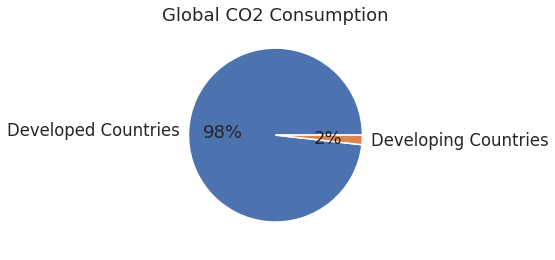

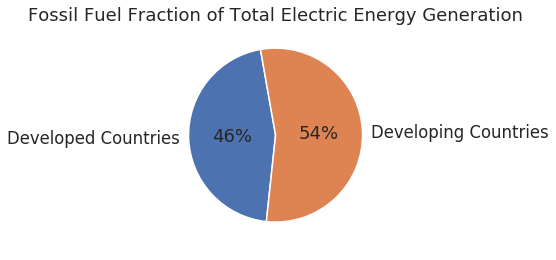

In [34]:
import matplotlib.pyplot as plt

# sum the total CO2 emissions of developing and developed countries
total_developed_emissions=developed_emissions_df.iloc[36,:].sum()
total_developing_emissions=developing_emissions_df.iloc[36,:].sum()
world_emissions=[total_developed_emissions,total_developing_emissions]
world_label=['Developed Countries','Developing Countries']

# sum the total electric energy generation in developing and developed countries
total_developed_renewable=developed_renewable_df.iloc[36,:].sum()
total_developing_renewable=developing_renewable_df.iloc[36,:].sum()
total_developed_fossil=developed_fossil_df.iloc[36,:].sum()
total_developing_fossil=developing_fossil_df.iloc[36,:].sum()
developed_total_generation=total_developed_renewable+total_developed_fossil
developing_total_generation=total_developing_renewable+total_developing_fossil

# divide fossil fuel generated electricity by total generated electricity to get fraction of fossil fuel generation
developed_generation_fossil_fraction=total_developed_fossil/developed_total_generation
developing_generation_fossil_fraction=total_developing_fossil/developing_total_generation
world_fossil_fraction=[developed_generation_fossil_fraction,developing_generation_fossil_fraction]

# plot pie charts
plt.pie(x=world_emissions, labels=world_label, autopct='%1.0f%%',pctdistance=.6)
plt.title("Global CO2 Consumption")
plt.show()

plt.pie(x=world_fossil_fraction, labels=world_label, startangle=100, autopct='%1.0f%%',pctdistance=.5)
plt.title("Fossil Fuel Fraction of Total Electric Energy Generation")

plt.show()

#3. Do developing countries rely more on fossil fuel or renewable energy sources? How about developed countries?

##Plot developing country renewable and fossil fuel elecricity generation

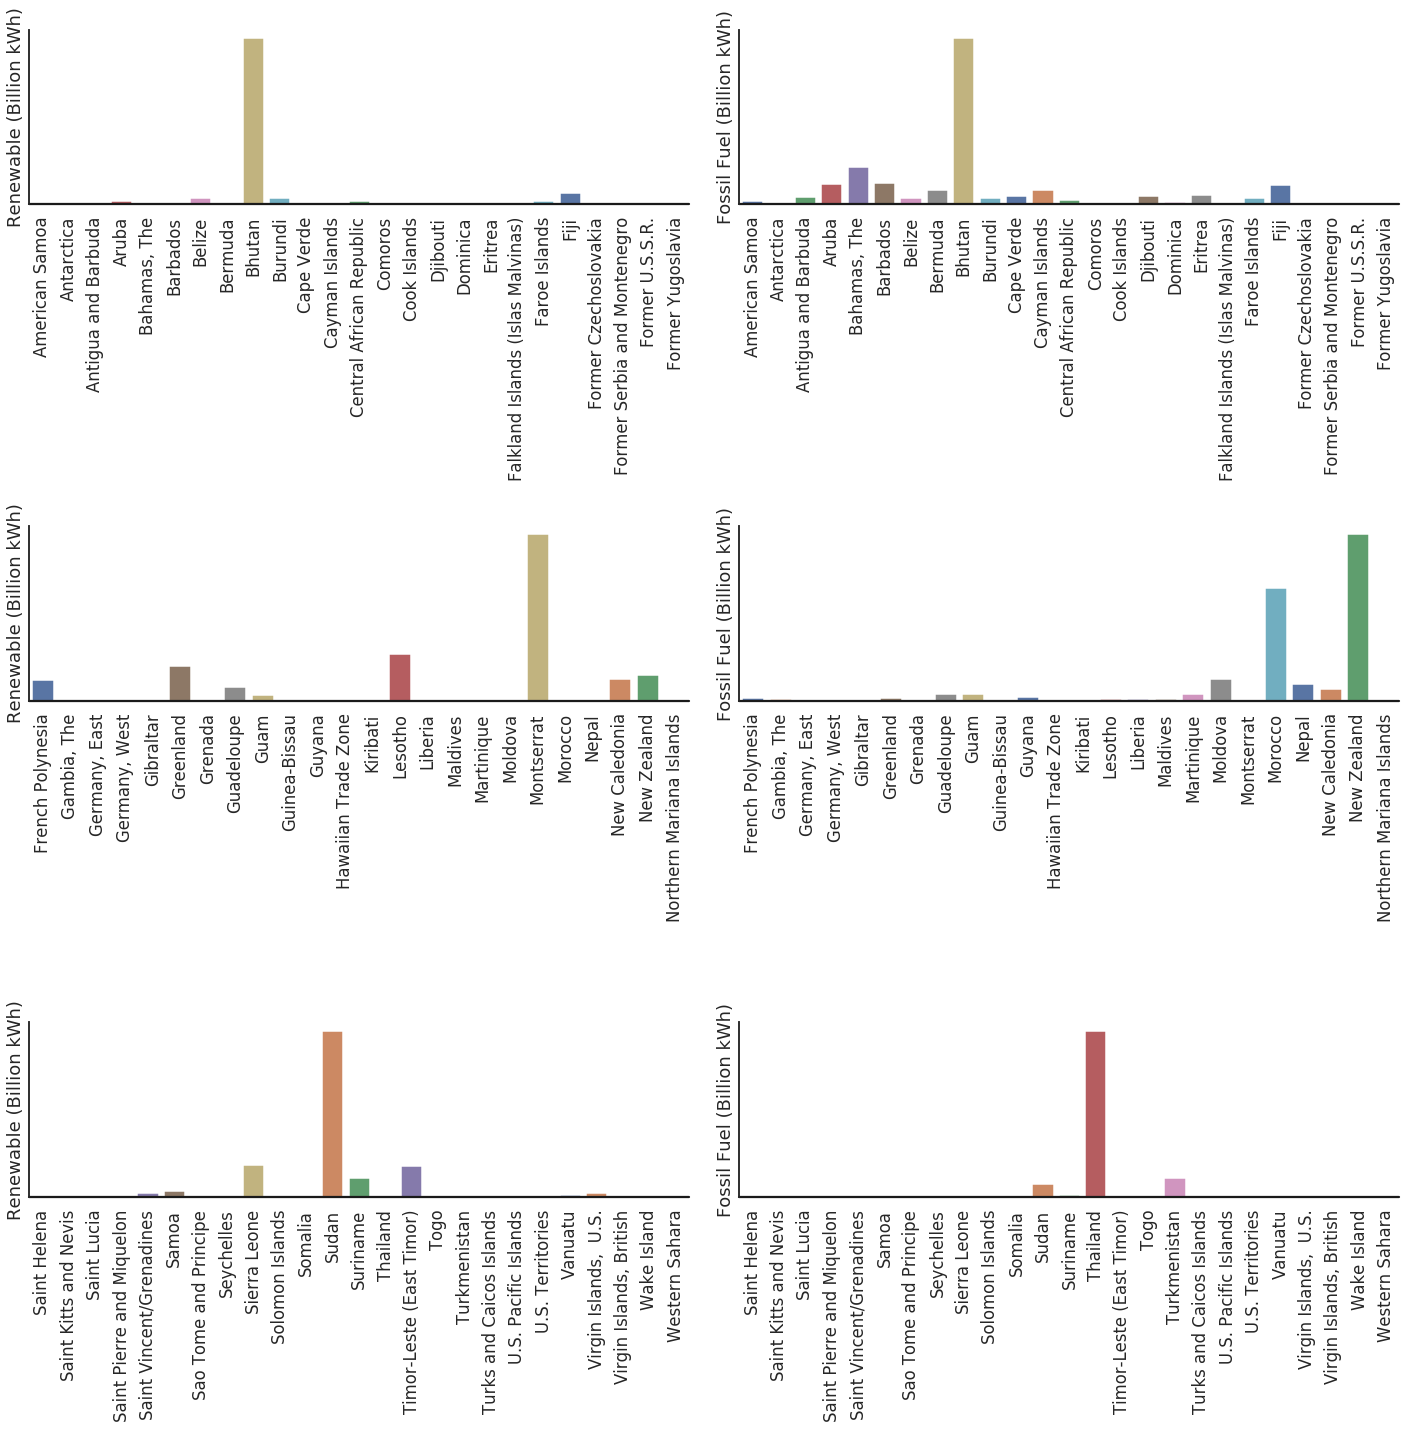

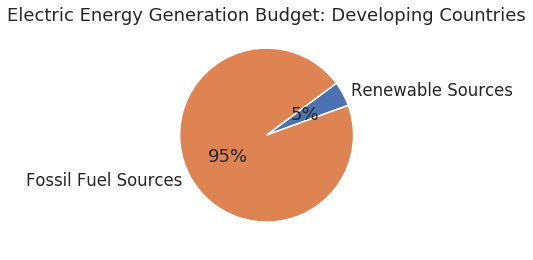

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")

# Because there is so much data, separate the plot into subplots for viewing purposes
developing_country_list1=developing_country_list[0:25]
developing_renewable1=developing_renewable_df.iloc[36,0:25]
developing_fossil1=developing_fossil_df.iloc[36,0:25]

developing_country_list2=developing_country_list[26:50]
developing_renewable2=developing_renewable_df.iloc[36,26:50]
developing_fossil2=developing_fossil_df.iloc[36,26:50]

developing_country_list3=developing_country_list[51:76]
developing_renewable3=developing_renewable_df.iloc[36,51:76]
developing_fossil3=developing_fossil_df.iloc[36,51:76]

# Set up first matplotlib figure
f, (axes) = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

# Plot first section of developing countries - emissions
x1 = developing_country_list1
y1 = developing_renewable1
sns.barplot(x=x1, y=y1, palette="deep", ax=axes[0][0])
axes[0][0].axhline(0, color="k", clip_on=False)
axes[0][0].set_ylabel("Renewable (Billion kWh)")
axes[0][0].xaxis.set_visible(True)
for xtick in axes[0][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot first section of developing coutries - GDP

y12=developing_fossil1
sns.barplot(x=x1, y=y12, palette="deep", ax=axes[0][1])
axes[0][1].axhline(0, color="k", clip_on=False)
axes[0][1].set_ylabel("Fossil Fuel (Billion kWh)")
axes[0][1].xaxis.set_visible(True)
for xtick in axes[0][1].get_xticklabels():
  xtick.set_rotation(90)


# Plot second section of developing coutries - emissions
x2=developing_country_list2
y2=developing_renewable2
sns.barplot(x=x2, y=y2, palette="deep", ax=axes[1][0])
axes[1][0].axhline(0, color="k", clip_on=False)
axes[1][0].set_ylabel("Renewable (Billion kWh)")
axes[1][0].xaxis.set_visible(True)
for xtick in axes[1][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot second section of developing coutries - GDP

y22=developing_fossil2
sns.barplot(x=x2, y=y22, palette="deep", ax=axes[1][1])
axes[1][1].axhline(0, color="k", clip_on=False)
axes[1][1].set_ylabel("Fossil Fuel (Billion kWh)")
axes[1][1].xaxis.set_visible(True)
for xtick in axes[1][1].get_xticklabels():
  xtick.set_rotation(90)

# Plot third section of developing countries - emissions
x3=developing_country_list3
y3=developing_renewable3
sns.barplot(x=x3, y=y3, palette="deep", ax=axes[2][0])
axes[2][0].axhline(0, color="k", clip_on=False)
axes[2][0].set_ylabel("Renewable (Billion kWh)")
axes[2][0].xaxis.set_visible(True)
for xtick in axes[2][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot third section of developing coutries - GDP

y32=developing_fossil3
sns.barplot(x=x3, y=y32, palette="deep", ax=axes[2][1])
axes[2][1].axhline(0, color="k", clip_on=False)
axes[2][1].set_ylabel("Fossil Fuel (Billion kWh)")
axes[2][1].xaxis.set_visible(True)
for xtick in axes[2][1].get_xticklabels():
  xtick.set_rotation(90)

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

plt.show()

total_developing_renewable=developing_renewable_df.iloc[36,:].sum()
total_developing_fossil=developing_fossil_df.iloc[36,:].sum()
developing_energy_source=[total_developing_renewable,total_developing_fossil]
world_label=['Renewable Sources','Fossil Fuel Sources']

plt.pie(x=developing_energy_source, labels=world_label, startangle=20, autopct='%1.0f%%',pctdistance=.5)
plt.title("Electric Energy Generation Budget: Developing Countries")

plt.show()

##Plot developed country renewable and fossil fuel energy generation

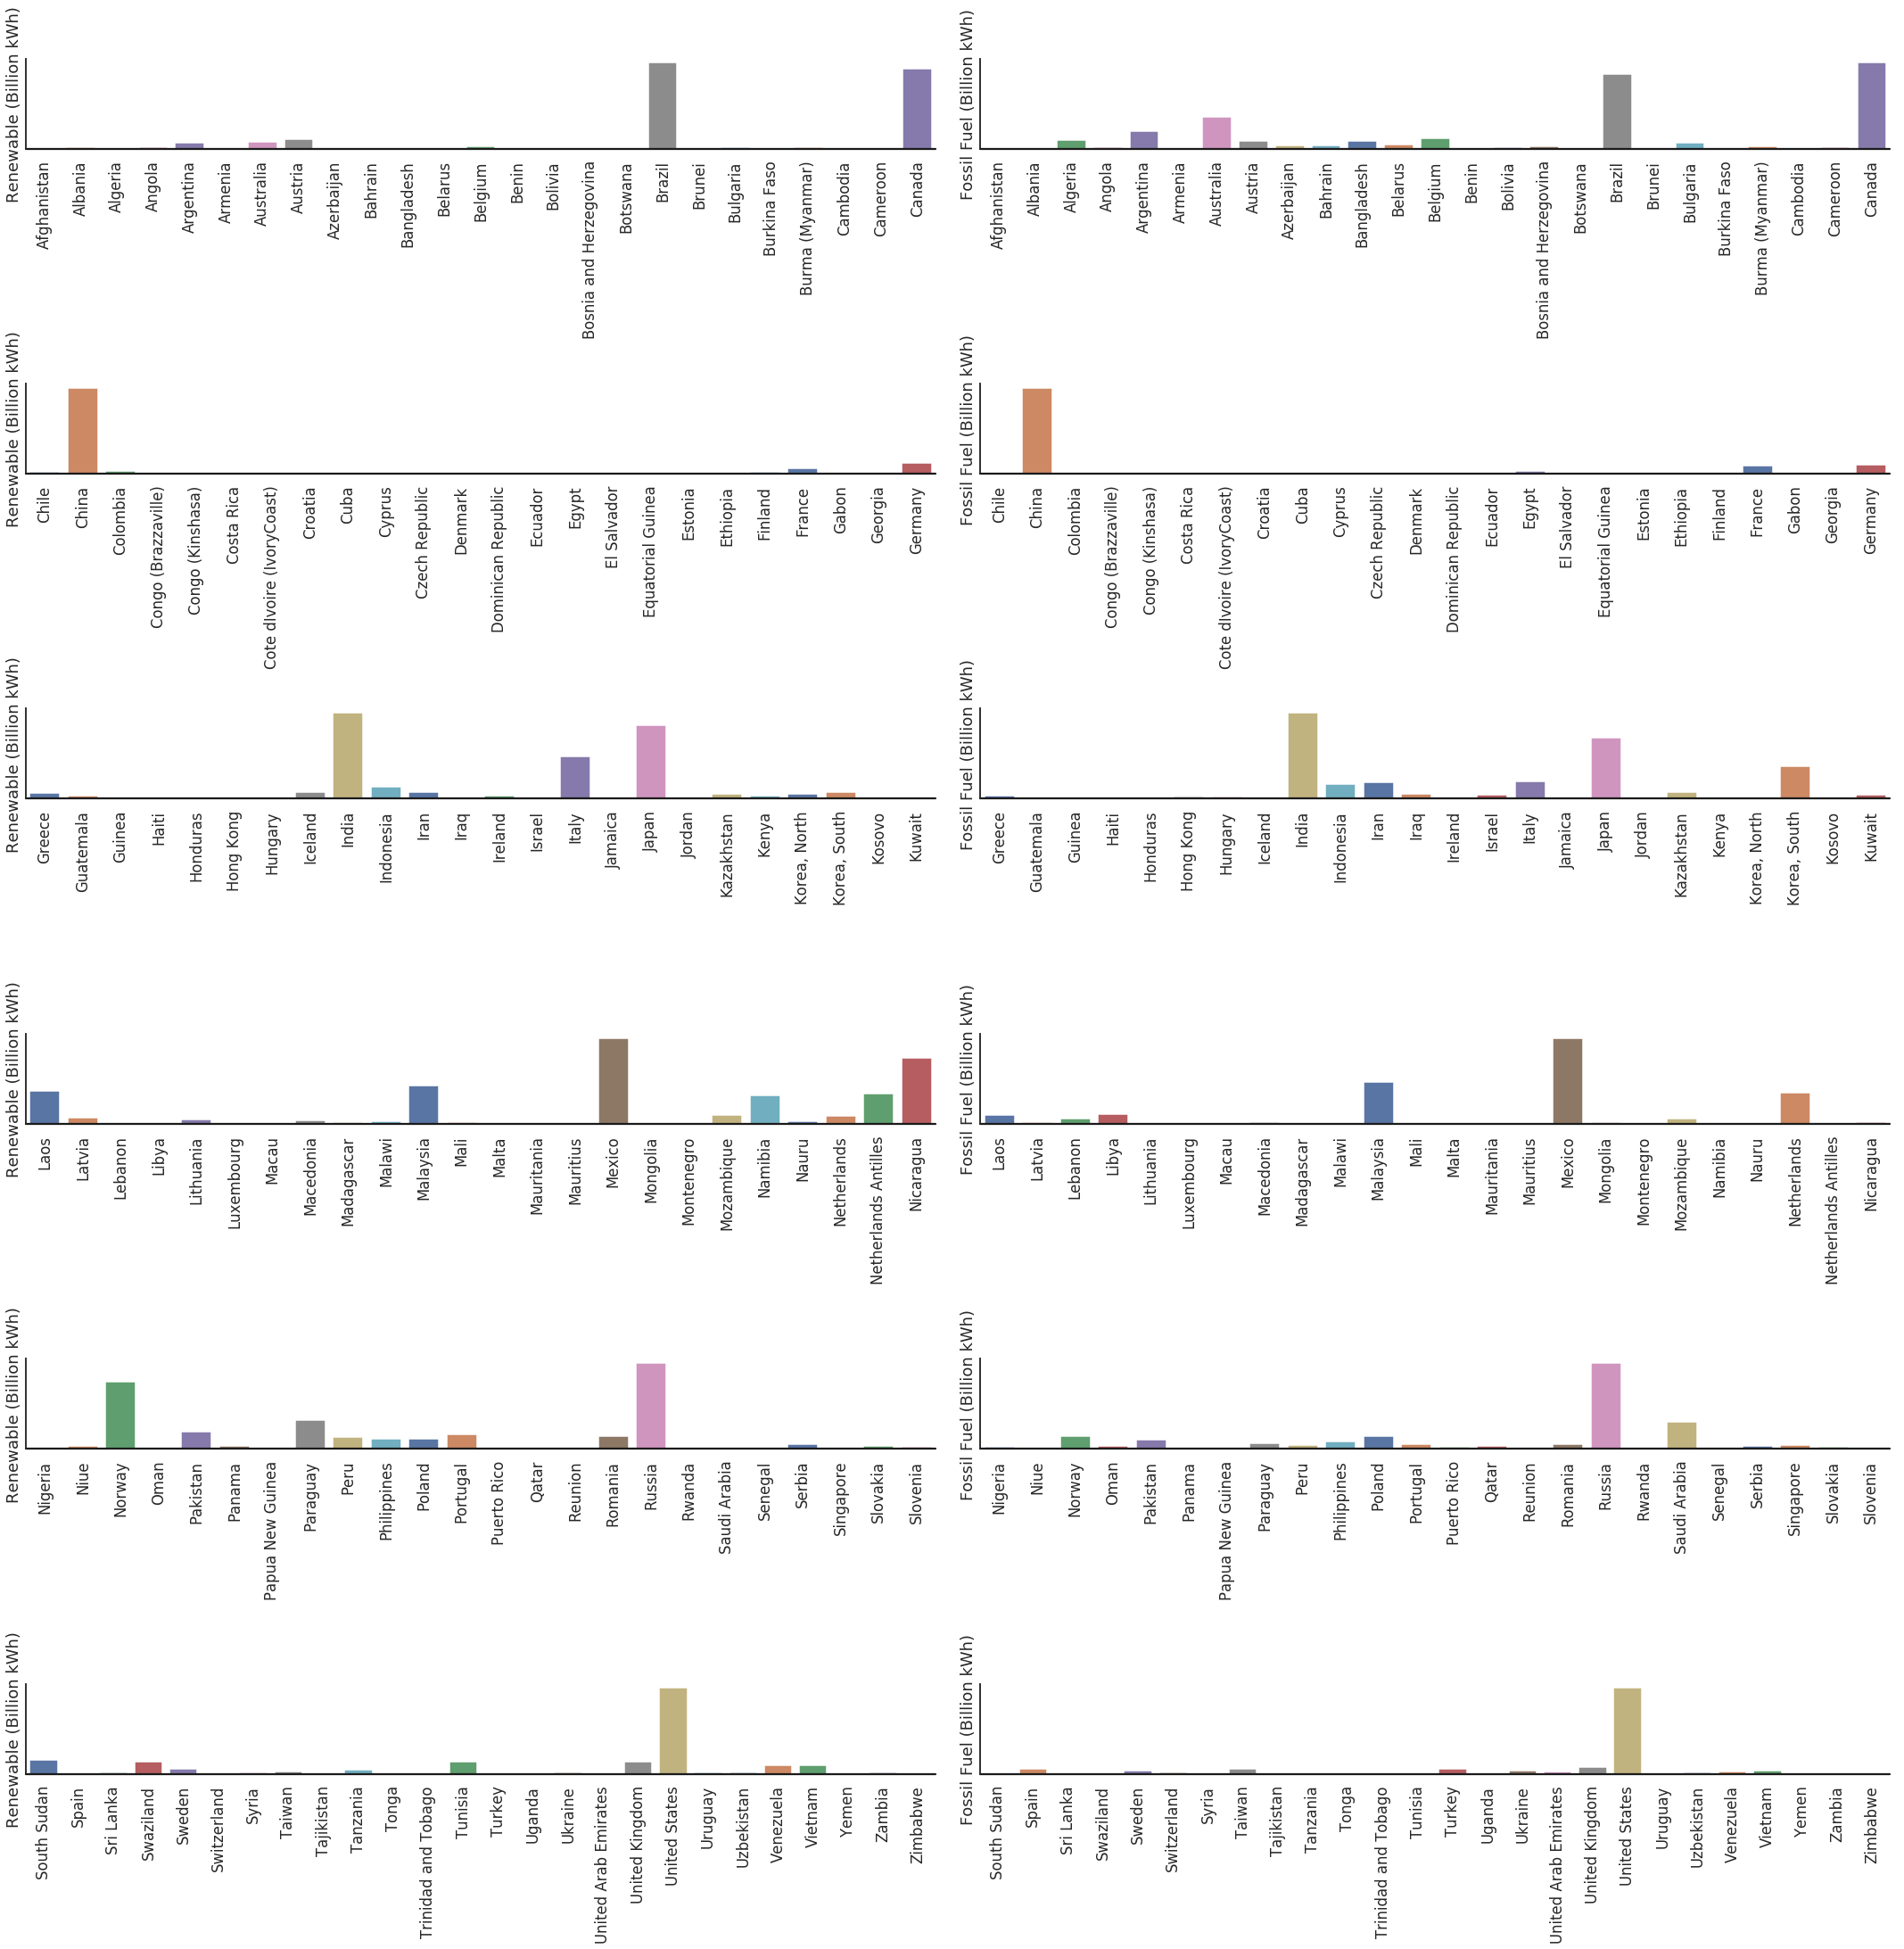

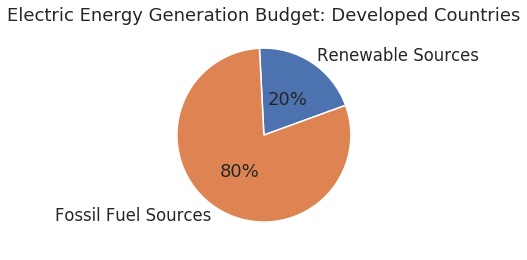

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")

# Because there is so much data, separate plots into subplots for viewing purposes
developed_country_list1=developed_country_list[0:25]
developed_renewable1=developed_renewable_df.iloc[36,0:25]
developed_fossil1=developed_fossil_df.iloc[36,0:25]

developed_country_list2=developed_country_list[26:50]
developed_renewable2=developed_renewable_df.iloc[36,26:50]
developed_fossil2=developed_fossil_df.iloc[36,26:50]

developed_country_list3=developed_country_list[51:75]
developed_renewable3=developed_renewable_df.iloc[36,51:75]
developed_fossil3=developed_fossil_df.iloc[36,51:75]

developed_country_list4=developed_country_list[76:100]
developed_renewable4=developed_renewable_df.iloc[36,76:100]
developed_fossil4=developed_fossil_df.iloc[36,76:100]

developed_country_list5=developed_country_list[101:125]
developed_renewable5=developed_renewable_df.iloc[36,101:125]
developed_fossil5=developed_fossil_df.iloc[36,101:125]

developed_country_list6=developed_country_list[126:152]
developed_renewable6=developed_renewable_df.iloc[36,126:152]
developed_fossil6=developed_fossil_df.iloc[36,126:152]

# Set up first matplotlib figure
f, (axes) = plt.subplots(nrows=6, ncols=2, figsize=(30, 30))

# Plot first section of developing countries - renewable
x1 = developed_country_list1
y1 = developed_renewable1
sns.barplot(x=x1, y=y1, palette="deep", ax=axes[0][0])
axes[0][0].axhline(0, color="k", clip_on=False)
axes[0][0].set_ylabel("Renewable (Billion kWh)")
axes[0][0].xaxis.set_visible(True)
for xtick in axes[0][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot first section of developing coutries - fossil

y12=developed_fossil1
sns.barplot(x=x1, y=y12, palette="deep", ax=axes[0][1])
axes[0][1].axhline(0, color="k", clip_on=False)
axes[0][1].set_ylabel("Fossil Fuel (Billion kWh)")
axes[0][1].xaxis.set_visible(True)
for xtick in axes[0][1].get_xticklabels():
  xtick.set_rotation(90)


# Plot second section of developing coutries - renewable
x2=developed_country_list2
y2=developed_renewable2
sns.barplot(x=x2, y=y2, palette="deep", ax=axes[1][0])
axes[1][0].axhline(0, color="k", clip_on=False)
axes[1][0].set_ylabel("Renewable (Billion kWh)")
axes[1][0].xaxis.set_visible(True)
for xtick in axes[1][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot second section of developing coutries - fossil

y22=developed_fossil2
sns.barplot(x=x2, y=y22, palette="deep", ax=axes[1][1])
axes[1][1].axhline(0, color="k", clip_on=False)
axes[1][1].set_ylabel("Fossil Fuel (Billion kWh)")
axes[1][1].xaxis.set_visible(True)
for xtick in axes[1][1].get_xticklabels():
  xtick.set_rotation(90)

# Plot third section of developing countries - renewable
x3=developed_country_list3
y3=developed_renewable3
sns.barplot(x=x3, y=y3, palette="deep", ax=axes[2][0])
axes[2][0].axhline(0, color="k", clip_on=False)
axes[2][0].set_ylabel("Renewable (Billion kWh)")
axes[2][0].xaxis.set_visible(True)
for xtick in axes[2][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot third section of developing coutries - fossil

y32=developed_fossil3
sns.barplot(x=x3, y=y32, palette="deep", ax=axes[2][1])
axes[2][1].axhline(0, color="k", clip_on=False)
axes[2][1].set_ylabel("Fossil Fuel (Billion kWh)")
axes[2][1].xaxis.set_visible(True)
for xtick in axes[2][1].get_xticklabels():
  xtick.set_rotation(90)

# Plot fourth section of developing countries - renewable
x4 = developed_country_list4
y4 = developed_renewable4
sns.barplot(x=x4, y=y4, palette="deep", ax=axes[3][0])
axes[3][0].axhline(0, color="k", clip_on=False)
axes[3][0].set_ylabel("Renewable (Billion kWh)")
axes[3][0].xaxis.set_visible(True)
for xtick in axes[3][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot fourth section of developing coutries - fossil

y42=developed_fossil4
sns.barplot(x=x4, y=y42, palette="deep", ax=axes[3][1])
axes[3][1].axhline(0, color="k", clip_on=False)
axes[3][1].set_ylabel("Fossil Fuel (Billion kWh)")
axes[3][1].xaxis.set_visible(True)
for xtick in axes[3][1].get_xticklabels():
  xtick.set_rotation(90) 
  
# Plot fifth section of developing countries - renewable
x5 = developed_country_list5
y5 = developed_renewable5
sns.barplot(x=x5, y=y5, palette="deep", ax=axes[4][0])
axes[4][0].axhline(0, color="k", clip_on=False)
axes[4][0].set_ylabel("Renewable (Billion kWh)")
axes[4][0].xaxis.set_visible(True)
for xtick in axes[4][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot first section of developing coutries - fossil

y52=developed_fossil5
sns.barplot(x=x5, y=y52, palette="deep", ax=axes[4][1])
axes[4][1].axhline(0, color="k", clip_on=False)
axes[4][1].set_ylabel("Fossil Fuel (Billion kWh)")
axes[4][1].xaxis.set_visible(True)
for xtick in axes[4][1].get_xticklabels():
  xtick.set_rotation(90) 
  
# Plot first section of developing countries - renewable
x6 = developed_country_list6
y6 = developed_renewable6
sns.barplot(x=x6, y=y6, palette="deep", ax=axes[5][0])
axes[5][0].axhline(0, color="k", clip_on=False)
axes[5][0].set_ylabel("Renewable (Billion kWh)")
axes[5][0].xaxis.set_visible(True)
for xtick in axes[5][0].get_xticklabels():
  xtick.set_rotation(90)

# Plot first section of developing coutries - fossil

y62=developed_fossil6
sns.barplot(x=x6, y=y62, palette="deep", ax=axes[5][1])
axes[5][1].axhline(0, color="k", clip_on=False)
axes[5][1].set_ylabel("Fossil Fuel (Billion kWh)")
axes[5][1].xaxis.set_visible(True)
for xtick in axes[5][1].get_xticklabels():
  xtick.set_rotation(90)  
  

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

plt.show()

total_developed_renewable=developed_renewable_df.iloc[36,:].sum()
total_developed_fossil=developed_fossil_df.iloc[36,:].sum()
developed_energy_source=[total_developed_renewable,total_developed_fossil]
world_label=['Renewable Sources','Fossil Fuel Sources']

plt.pie(x=developed_energy_source, labels=world_label, startangle=20, autopct='%1.0f%%',pctdistance=.5)
plt.title("Electric Energy Generation Budget: Developed Countries")

plt.show()